## AMAZON SALES  REPORT ANALAYSIS  

## About the Dataset
Amazon is an online retailer, manufacturer of electronic book readers, and Web services provider that became the iconic example of electronic commerce. Its headquarters are in Seattle, Washington.This dataset tells us about the information about the various catergories of clothes being sold by the site in period. It also provide the details about style, size , qty purchased,status, channel,service, state and cities. We'll be analysing the dataset on basis of perdicting the factors affecting the quantity purchase of the category, services and channels choosen and states delivery and status.

## ASSIGNEMENT 1 

# Objectives 

1. To clean dataset as the data contain missing, invalid and inconsistent values, which needs to be cleaned before analysis.
2. To tranform Data to make dataset more usable in format, such as converting categorical variables into numerical ones
3. To reduce the size of dataset as the dataset is too large for analysis, so it may need to be reduced by selecting a subset of the data. 
4. To Select relevant Features as some features in the dataset are not be relevant to the problem being solved, so they may need to be removed.
5. To scale and normalize the features of non categorical variable to be on the same range and reduce the affect of outliers
6. To find columns with null values and imputing them with appropriate parameter 
7. To categorize data columns in categorical and non categorical basis 
8. To convert non numeric columns to numeric ones to make it easy for analysis 
9. To analyze data on basic on descriptive statsitics 
10. To find the dependent and independent variables using regression 
11. To get the dataset to be ready to be used for analysis 
12. To Treat of Missing Data values [Null, NaN, None]
13. To Numerically Code the Data [Categorical : Nominal | Ordinal]
14. To get Data Transformation & Rescaling [Treatment of Outliers]
15. To Bifurcate [Training & Testing Datasets] to make it easy for analysis 

## Briefs on the Analysis
As our objective of the analysis is the analyse the factors affecting the qty sales of different cloth catergory, customers opting for different service level and channels, states having high demand. This will help amazon opting for specified customers services and manufacturing of products and channel of distribution. To fulfill our objective there are few columns and rows that are not of our use , thus we'll be dropping them and  imputing values of important rows and columns. Further as non numeric data can't be imputed and used further for analysis, thus we encoded and normalise the data values to  make it easy to analyse

In [1]:
# Required Libraries
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets 
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation
import seaborn as sns # For Data Visualization
from sklearn import metrics #for checking accuracy
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # For Decision Tree Model
from sklearn.metrics import confusion_matrix, classification_report # For Decision Tree Model Evaluation

In [76]:
#displaying all the columns 
pd.set_option('display.max_columns', None)

In [77]:
#reading the datset
df = pd.read_csv(r"C:\Users\Harmeet Kaur\Desktop\python\Amazon Sale Report.csv")
df_data = df.copy()
df

C:\Users\Harmeet Kaur\AppData\Local\Temp\ipykernel_5808\3607263448.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Harmeet Kaur\Desktop\python\Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [78]:
#converting space and none to np.nan 
df.replace(to_replace=[None], value=np.nan, inplace=True)
df.replace(to_replace='isnull', value=np.nan, inplace=True)
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [79]:
#knowing the dataset shape
df.shape

(128975, 24)

In [80]:
#calculating the null values of columns 
df_missingvalues_columns = df.isna().sum(axis = 0).sort_values(ascending = False)
df_missingvalues_columns

fulfilled-by          89698
promotion-ids         49153
Unnamed: 22           49050
currency               7795
Amount                 7795
Courier Status         6872
ship-country             33
ship-postal-code         33
ship-state               33
ship-city                33
ship-service-level        0
Style                     0
Date                      0
B2B                       0
Status                    0
Fulfilment                0
Sales Channel             0
Qty                       0
Order ID                  0
ASIN                      0
Size                      0
Category                  0
SKU                       0
index                     0
dtype: int64

In [81]:
#calculating the percentage of null values 
df_missingpercent = df.isnull().sum(axis=0).sort_values(ascending=False)/len(df)*100
df_missingpercent
#      column has the highest number of nan values followed by       column

fulfilled-by          69.546811
promotion-ids         38.110487
Unnamed: 22           38.030626
currency               6.043807
Amount                 6.043807
Courier Status         5.328164
ship-country           0.025586
ship-postal-code       0.025586
ship-state             0.025586
ship-city              0.025586
ship-service-level     0.000000
Style                  0.000000
Date                   0.000000
B2B                    0.000000
Status                 0.000000
Fulfilment             0.000000
Sales Channel          0.000000
Qty                    0.000000
Order ID               0.000000
ASIN                   0.000000
Size                   0.000000
Category               0.000000
SKU                    0.000000
index                  0.000000
dtype: float64

In [82]:
#drop of columns having missing values more that 66 percent 
df.drop('fulfilled-by', axis=1, inplace=True)

In [83]:
# dropping row having qty = 0, as the data will be irrelevant to us and might impact our analysis
df = df[df['Qty'] != 0]

In [84]:
#dropping the columns 
df.drop(['index', 'Order ID','ASIN','ship-postal-code', 'ship-country','promotion-ids','Unnamed: 22','currency'], axis= 1 , inplace = True)

- Columns to drop
- Index , order Id, ASIN - not suitable for analysis 
- Unnamed: 22 - undeterminable data
- fulfilled-by - only value was amazon courier "easy-ship" with no other relationship
- ship-country - The shipping Country is India
- currency - the currency is Indian Rupee (INR)ship- postal code - not required for analysis 
- promotion-ids - not relevant for analysis 

In [85]:
#knowing the left columns 
df.columns

Index(['Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level',
       'Style', 'SKU', 'Category', 'Size', 'Courier Status', 'Qty', 'Amount',
       'ship-city', 'ship-state', 'B2B'],
      dtype='object')

In [86]:
#calculating the null values after dropping
df.isna().sum(axis = 0).sort_values(ascending = False)
df_missingpercentage = df.isnull().sum(axis=0).sort_values(ascending=False)/len(df)*100
df_missingpercentage
#    only    columns have mssing values with highest missing value being      percent 

Amount                0.106742
ship-city             0.024103
ship-state            0.024103
Date                  0.000000
Status                0.000000
Fulfilment            0.000000
Sales Channel         0.000000
ship-service-level    0.000000
Style                 0.000000
SKU                   0.000000
Category              0.000000
Size                  0.000000
Courier Status        0.000000
Qty                   0.000000
B2B                   0.000000
dtype: float64

In [87]:
#data left after processing 
len(df)/len(df_data)*100

90.07016863733281

In [88]:
#knowing the unique values in each column for processing
df_unique = df.nunique().to_frame(name='Count of unique values')
df_unique

,Count of unique values
Date,91
Status,13
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1372
SKU,7142
Category,9
Size,11
Courier Status,2


In [89]:
# Record-wise Missing Data Information (Top 5)
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data 

22930     2
124357    2
124358    2
124359    2
80011     2
dtype: int64

In [90]:
## bifurating the dataset columns for easy analysis 
## percentiles = df['Years Employed'].quantile([0.25, 0.5, 0.75]).values

# Create bins based on the calculated percentiles
## bins = [0] + percentiles.tolist() + [df['Years Employed'].max()]

# Create labels for each bin
## labels = ['Entry-level','Middle_level','Senior-level','Executive-level']
## df['AgeSeg'] = pd.cut(x = df['Age'],bins =[0,30,45,60],labels = ['Young','Middle_age','old'])
## df['YearEmpSeg'] = pd.cut(x=df['Years Employed'], bins=bins, labels=labels)

In [91]:
#bifurcating in categorical and non categorical data
df_cat = df[['Status','Fulfilment','Sales Channel ','ship-service-level','Style', 'Category', 'Size','Courier Status','Qty','ship-city','ship-state','B2B']] # Categorical Data [Nominal | Ordinal]
df_noncat = df[['Amount']] 

In [92]:
#analysing the dataset dtype and count
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116168 entries, 1 to 128974
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                116168 non-null  object 
 1   Status              116168 non-null  object 
 2   Fulfilment          116168 non-null  object 
 3   Sales Channel       116168 non-null  object 
 4   ship-service-level  116168 non-null  object 
 5   Style               116168 non-null  object 
 6   SKU                 116168 non-null  object 
 7   Category            116168 non-null  object 
 8   Size                116168 non-null  object 
 9   Courier Status      116168 non-null  object 
 10  Qty                 116168 non-null  int64  
 11  Amount              116044 non-null  float64
 12  ship-city           116140 non-null  object 
 13  ship-state          116140 non-null  object 
 14  B2B                 116168 non-null  bool   
dtypes: bool(1), float64(1), int64(1), 

In [22]:
#descriptive statsistics 
import statsmodels as sm
df_noncat_stats = sm.stats.descriptivestats.Description(df_noncat).frame
df_noncat_stats
#The skewness of the  distribution is positive (0.864545), indicating that the tail of the distribution is longer on the positive side. 
#The kurtosis value of 5.805595 indicates that the distribution is leptokurtic, meaning that it has a higher peak and fatter tails than a normal distribution.
#The Jarque-Bera test statistic is 52515.324391 with a p-value of 0.000000, indicating that the noncat column distribution is significantly different from a normal distribution.
#The coefficient of variation (CV) is 0.434978, indicating that the standard deviation is approximately 43% of the mean.
#The range of values, along with the positive skewness and high kurtosis, suggest that there may be some extreme values or outliers that could impact the analysis, thus needed to be treated 

,Amount
nobs,116168.000000
missing,124.000000
mean,649.775137
std_err,0.829697
upper_ci,651.401312
lower_ci,648.148962
std,282.638056
iqr,339.000000
iqr_normal,251.301076
mad,219.154412


In [93]:
#imputing the categorical values using mode 
si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 
si_cat_fit = si_cat.fit_transform(df_cat)
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df_cat.columns); df_cat_mdi # Missing Categorical Data Imputed Subset
df_cat_mdi.info()
df_cat_mdi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116168 entries, 0 to 116167
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Status              116168 non-null  object
 1   Fulfilment          116168 non-null  object
 2   Sales Channel       116168 non-null  object
 3   ship-service-level  116168 non-null  object
 4   Style               116168 non-null  object
 5   Category            116168 non-null  object
 6   Size                116168 non-null  object
 7   Courier Status      116168 non-null  object
 8   Qty                 116168 non-null  object
 9   ship-city           116168 non-null  object
 10  ship-state          116168 non-null  object
 11  B2B                 116168 non-null  object
dtypes: object(12)
memory usage: 10.6+ MB


,Status,Fulfilment,Sales Channel,ship-service-level,Style,Category,Size,Courier Status,Qty,ship-city,ship-state,B2B
0,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,kurta,3XL,Shipped,1,BENGALURU,KARNATAKA,False
1,Shipped,Amazon,Amazon.in,Expedited,JNE3371,kurta,XL,Shipped,1,NAVI MUMBAI,MAHARASHTRA,True
2,Shipped,Amazon,Amazon.in,Expedited,JNE3671,Top,3XL,Shipped,1,CHENNAI,TAMIL NADU,False
3,Shipped,Amazon,Amazon.in,Expedited,SET264,Set,XL,Shipped,1,GHAZIABAD,UTTAR PRADESH,False
4,Shipped,Amazon,Amazon.in,Expedited,J0095,Set,L,Shipped,1,CHANDIGARH,CHANDIGARH,False
...,...,...,...,...,...,...,...,...,...,...,...,...
116163,Shipped,Amazon,Amazon.in,Expedited,JNE3697,kurta,XL,Shipped,1,HYDERABAD,TELANGANA,False
116164,Shipped,Amazon,Amazon.in,Expedited,SET401,Set,M,Shipped,1,GURUGRAM,HARYANA,False
116165,Shipped,Amazon,Amazon.in,Expedited,J0157,Western Dress,XXL,Shipped,1,HYDERABAD,TELANGANA,False
116166,Shipped,Amazon,Amazon.in,Expedited,J0012,Set,XS,Shipped,1,Halol,Gujarat,False


In [94]:
#imputing the noncatgeorical column null values using mean of the colum# Missing Non-Categorical Data Imputed Subset using Simple Imputer
si_noncat = SimpleImputer(missing_values=np.nan, strategy='mean') 
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns); df_noncat_mdi_si 
df_noncat_mdi_si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116168 entries, 0 to 116167
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Amount  116168 non-null  float64
dtypes: float64(1)
memory usage: 907.7 KB


In [95]:
df_cat_mdi_code = df_cat_mdi.copy()
df_cat_mdi_code

,Status,Fulfilment,Sales Channel,ship-service-level,Style,Category,Size,Courier Status,Qty,ship-city,ship-state,B2B
0,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,kurta,3XL,Shipped,1,BENGALURU,KARNATAKA,False
1,Shipped,Amazon,Amazon.in,Expedited,JNE3371,kurta,XL,Shipped,1,NAVI MUMBAI,MAHARASHTRA,True
2,Shipped,Amazon,Amazon.in,Expedited,JNE3671,Top,3XL,Shipped,1,CHENNAI,TAMIL NADU,False
3,Shipped,Amazon,Amazon.in,Expedited,SET264,Set,XL,Shipped,1,GHAZIABAD,UTTAR PRADESH,False
4,Shipped,Amazon,Amazon.in,Expedited,J0095,Set,L,Shipped,1,CHANDIGARH,CHANDIGARH,False
...,...,...,...,...,...,...,...,...,...,...,...,...
116163,Shipped,Amazon,Amazon.in,Expedited,JNE3697,kurta,XL,Shipped,1,HYDERABAD,TELANGANA,False
116164,Shipped,Amazon,Amazon.in,Expedited,SET401,Set,M,Shipped,1,GURUGRAM,HARYANA,False
116165,Shipped,Amazon,Amazon.in,Expedited,J0157,Western Dress,XXL,Shipped,1,HYDERABAD,TELANGANA,False
116166,Shipped,Amazon,Amazon.in,Expedited,J0012,Set,XS,Shipped,1,Halol,Gujarat,False


In [96]:
## if want to drop rows with null values 
## 1.3. Missing Data Exclusion [MCAR | MAR (> 50%)]

# df_cat_mdi.dropna(axis=0, how='all', inplace=True) # Categorical Data Subset
# df_noncat_mdi_si.dropna(axis=0, how='all', inplace=True) # Non-Categorical Data Subset

# columns wise 
## df_cat_mdi.dropna(axis=1, how='all', inplace=True) # Categorical Data Subset
## df_noncat_mdi_si.dropna(axis=1, how='all', inplace=True) # Non-Categorical Data Subset

In [97]:
# when have to encode a particular column only 
## df_cat_mdt_code_pd = df_cat.astype('category')
## df_cat_mdt_code_pd['Age_code'] = df_cat_mdt_code_pd['AgeSeg'].cat.codes
## df_cat_mdt_code_pd['Worklevel_code'] = df_cat_mdt_code_pd['YearEmpSeg'].cat.codes
# df_cat_mdt_code_pd # (Missing Data Treated) Numeric Coded Categorical Dataset using Pandas

Numeric Encoding of Categorical Data [Nominal & Ordinal] 

In [98]:
# encoding the categorical columns 
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat_mdi_code)
df_cat_code_oe = pd.DataFrame(oe_fit,columns=['Status_code', 'Fulfilment_code','Sales Channel_code ', 'ship-service-level_code','Style_code',
       'Category_code', 'Size_code', 'Courier Status_code', 'Qty_code', 'ship-city_code','ship-state_code', 'B2B_code'])
df_cat_mdt_code_oe = df_cat_mdi_code.join(df_cat_code_oe)

In [99]:
#dataset with categoical values and encoded columnes  
df_cat_mdt_code_oe

,Status,Fulfilment,Sales Channel,ship-service-level,Style,Category,Size,Courier Status,Qty,ship-city,ship-state,B2B,Status_code,Fulfilment_code,Sales Channel_code,ship-service-level_code,Style_code,Category_code,Size_code,Courier Status_code,Qty_code,ship-city_code,ship-state_code,B2B_code
0,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,kurta,3XL,Shipped,1,BENGALURU,KARNATAKA,False,5.0,1.0,0.0,1.0,846.0,8.0,0.0,0.0,0.0,734.0,22.0,0.0
1,Shipped,Amazon,Amazon.in,Expedited,JNE3371,kurta,XL,Shipped,1,NAVI MUMBAI,MAHARASHTRA,True,3.0,0.0,0.0,0.0,532.0,8.0,8.0,0.0,0.0,5076.0,27.0,1.0
2,Shipped,Amazon,Amazon.in,Expedited,JNE3671,Top,3XL,Shipped,1,CHENNAI,TAMIL NADU,False,3.0,0.0,0.0,0.0,753.0,6.0,0.0,0.0,0.0,1385.0,54.0,0.0
3,Shipped,Amazon,Amazon.in,Expedited,SET264,Set,XL,Shipped,1,GHAZIABAD,UTTAR PRADESH,False,3.0,0.0,0.0,0.0,1231.0,5.0,8.0,0.0,0.0,2368.0,57.0,0.0
4,Shipped,Amazon,Amazon.in,Expedited,J0095,Set,L,Shipped,1,CHANDIGARH,CHANDIGARH,False,3.0,0.0,0.0,0.0,180.0,5.0,5.0,0.0,0.0,1334.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116163,Shipped,Amazon,Amazon.in,Expedited,JNE3697,kurta,XL,Shipped,1,HYDERABAD,TELANGANA,False,3.0,0.0,0.0,0.0,773.0,8.0,8.0,0.0,0.0,2754.0,55.0,0.0
116164,Shipped,Amazon,Amazon.in,Expedited,SET401,Set,M,Shipped,1,GURUGRAM,HARYANA,False,3.0,0.0,0.0,0.0,1347.0,5.0,6.0,0.0,0.0,2478.0,18.0,0.0
116165,Shipped,Amazon,Amazon.in,Expedited,J0157,Western Dress,XXL,Shipped,1,HYDERABAD,TELANGANA,False,3.0,0.0,0.0,0.0,236.0,7.0,10.0,0.0,0.0,2754.0,55.0,0.0
116166,Shipped,Amazon,Amazon.in,Expedited,J0012,Set,XS,Shipped,1,Halol,Gujarat,False,3.0,0.0,0.0,0.0,119.0,5.0,9.0,0.0,0.0,2784.0,17.0,0.0


Data Transformation & Rescaling [Treatment of Outliers]

In [100]:
## 3.1. Standardization - ctrl + /


## ss = StandardScaler()  -- z = (x - mean) / standard deviation
## ss_fit = ss.fit_transform(df_noncat[['DebtIncomeRatio','Other Debt', 'Card Debt', 'Income']])
## df_noncat_std = pd.DataFrame(ss_fit, columns=['DebtIncomeRatio_std','Other Debt_std', 'Card Debt_std', 'Income_std']); df_noncat_std
## df_noncat_mdt_std = df_noncat.join(df_noncat_std); df_noncat_mdt_std # (Missing Data Treated) Standardized Non-Categorical Dataset using Scikit Learn Standard Scaler

#df_noncat_mdt_std = pd.merge(df_noncat_mdt, df_noncat_std, left_index=True, right_index=True); df_noncat_mdt_std

## This will transform the variable to have a mean of 0 and a standard deviation of 1, which is useful in some statistical analyses

In [101]:
# Normalization : Min-Max Scaling - formula - x_new = (x - min) / (max - min)
mms = MinMaxScaler() 
mms_fit = mms.fit_transform(df_noncat_mdi_si[['Amount']])
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=['Amount_mmnorm']); df_noncat_minmax_norm
df_noncat_mdt_mmn = df_noncat_mdi_si.join(df_noncat_minmax_norm); df_noncat_mdt_mmn 
# (Missing Data Treated) Normalized Non-Categorical Dataset using Sikit Learn Min-Max Scaler
# Normalization will help to reduce the effect of extreme values.As, our dataset have Outliers or extreme values which can have a disproportionate impact on the analysis if not handled appropriately. Normalization can help mitigate this effect.

,Amount,Amount_mmnorm
0,406.0,0.072708
1,329.0,0.058918
2,574.0,0.102794
3,824.0,0.147564
4,653.0,0.116941
...,...,...
116163,517.0,0.092586
116164,999.0,0.178904
116165,690.0,0.123567
116166,1199.0,0.214721


In [102]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_mdt_code_oe.copy(); df_cat_ppd 

,Status,Fulfilment,Sales Channel,ship-service-level,Style,Category,Size,Courier Status,Qty,ship-city,ship-state,B2B,Status_code,Fulfilment_code,Sales Channel_code,ship-service-level_code,Style_code,Category_code,Size_code,Courier Status_code,Qty_code,ship-city_code,ship-state_code,B2B_code
0,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,kurta,3XL,Shipped,1,BENGALURU,KARNATAKA,False,5.0,1.0,0.0,1.0,846.0,8.0,0.0,0.0,0.0,734.0,22.0,0.0
1,Shipped,Amazon,Amazon.in,Expedited,JNE3371,kurta,XL,Shipped,1,NAVI MUMBAI,MAHARASHTRA,True,3.0,0.0,0.0,0.0,532.0,8.0,8.0,0.0,0.0,5076.0,27.0,1.0
2,Shipped,Amazon,Amazon.in,Expedited,JNE3671,Top,3XL,Shipped,1,CHENNAI,TAMIL NADU,False,3.0,0.0,0.0,0.0,753.0,6.0,0.0,0.0,0.0,1385.0,54.0,0.0
3,Shipped,Amazon,Amazon.in,Expedited,SET264,Set,XL,Shipped,1,GHAZIABAD,UTTAR PRADESH,False,3.0,0.0,0.0,0.0,1231.0,5.0,8.0,0.0,0.0,2368.0,57.0,0.0
4,Shipped,Amazon,Amazon.in,Expedited,J0095,Set,L,Shipped,1,CHANDIGARH,CHANDIGARH,False,3.0,0.0,0.0,0.0,180.0,5.0,5.0,0.0,0.0,1334.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116163,Shipped,Amazon,Amazon.in,Expedited,JNE3697,kurta,XL,Shipped,1,HYDERABAD,TELANGANA,False,3.0,0.0,0.0,0.0,773.0,8.0,8.0,0.0,0.0,2754.0,55.0,0.0
116164,Shipped,Amazon,Amazon.in,Expedited,SET401,Set,M,Shipped,1,GURUGRAM,HARYANA,False,3.0,0.0,0.0,0.0,1347.0,5.0,6.0,0.0,0.0,2478.0,18.0,0.0
116165,Shipped,Amazon,Amazon.in,Expedited,J0157,Western Dress,XXL,Shipped,1,HYDERABAD,TELANGANA,False,3.0,0.0,0.0,0.0,236.0,7.0,10.0,0.0,0.0,2754.0,55.0,0.0
116166,Shipped,Amazon,Amazon.in,Expedited,J0012,Set,XS,Shipped,1,Halol,Gujarat,False,3.0,0.0,0.0,0.0,119.0,5.0,9.0,0.0,0.0,2784.0,17.0,0.0


In [103]:
# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_mdt_mmn.copy(); df_noncat_ppd 

,Amount,Amount_mmnorm
0,406.0,0.072708
1,329.0,0.058918
2,574.0,0.102794
3,824.0,0.147564
4,653.0,0.116941
...,...,...
116163,517.0,0.092586
116164,999.0,0.178904
116165,690.0,0.123567
116166,1199.0,0.214721


In [104]:
# Pre-Processed Dataset
df_ppd = df_cat_ppd.join(df_noncat_ppd); df_ppd 

,Status,Fulfilment,Sales Channel,ship-service-level,Style,Category,Size,Courier Status,Qty,ship-city,ship-state,B2B,Status_code,Fulfilment_code,Sales Channel_code,ship-service-level_code,Style_code,Category_code,Size_code,Courier Status_code,Qty_code,ship-city_code,ship-state_code,B2B_code,Amount,Amount_mmnorm
0,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,kurta,3XL,Shipped,1,BENGALURU,KARNATAKA,False,5.0,1.0,0.0,1.0,846.0,8.0,0.0,0.0,0.0,734.0,22.0,0.0,406.0,0.072708
1,Shipped,Amazon,Amazon.in,Expedited,JNE3371,kurta,XL,Shipped,1,NAVI MUMBAI,MAHARASHTRA,True,3.0,0.0,0.0,0.0,532.0,8.0,8.0,0.0,0.0,5076.0,27.0,1.0,329.0,0.058918
2,Shipped,Amazon,Amazon.in,Expedited,JNE3671,Top,3XL,Shipped,1,CHENNAI,TAMIL NADU,False,3.0,0.0,0.0,0.0,753.0,6.0,0.0,0.0,0.0,1385.0,54.0,0.0,574.0,0.102794
3,Shipped,Amazon,Amazon.in,Expedited,SET264,Set,XL,Shipped,1,GHAZIABAD,UTTAR PRADESH,False,3.0,0.0,0.0,0.0,1231.0,5.0,8.0,0.0,0.0,2368.0,57.0,0.0,824.0,0.147564
4,Shipped,Amazon,Amazon.in,Expedited,J0095,Set,L,Shipped,1,CHANDIGARH,CHANDIGARH,False,3.0,0.0,0.0,0.0,180.0,5.0,5.0,0.0,0.0,1334.0,9.0,0.0,653.0,0.116941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116163,Shipped,Amazon,Amazon.in,Expedited,JNE3697,kurta,XL,Shipped,1,HYDERABAD,TELANGANA,False,3.0,0.0,0.0,0.0,773.0,8.0,8.0,0.0,0.0,2754.0,55.0,0.0,517.0,0.092586
116164,Shipped,Amazon,Amazon.in,Expedited,SET401,Set,M,Shipped,1,GURUGRAM,HARYANA,False,3.0,0.0,0.0,0.0,1347.0,5.0,6.0,0.0,0.0,2478.0,18.0,0.0,999.0,0.178904
116165,Shipped,Amazon,Amazon.in,Expedited,J0157,Western Dress,XXL,Shipped,1,HYDERABAD,TELANGANA,False,3.0,0.0,0.0,0.0,236.0,7.0,10.0,0.0,0.0,2754.0,55.0,0.0,690.0,0.123567
116166,Shipped,Amazon,Amazon.in,Expedited,J0012,Set,XS,Shipped,1,Halol,Gujarat,False,3.0,0.0,0.0,0.0,119.0,5.0,9.0,0.0,0.0,2784.0,17.0,0.0,1199.0,0.214721


In [105]:
#logistic regression with independent variables category, size and qty and dependent being B2B
import statsmodels.api as sm
lry = df_ppd['B2B_code']
lrx= df_ppd[['Category_code', 'Size_code', 'Qty_code']]

logistic_regression_model = sm.Logit(lry, lrx).fit()
logistic_regression_model.summary()


Optimization terminated successfully.
         Current function value: 0.047536
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               B2B_code   No. Observations:               116168
Model:                          Logit   Df Residuals:                   116165
Method:                           MLE   Df Model:                            2
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                 -0.1261
Time:                        16:27:19   Log-Likelihood:                -5522.2
converged:                       True   LL-Null:                       -4903.7
Covariance Type:            nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Category_code    -0.6039      0.008    -75.866      0.000      -0.620      -0.588
Size_code        -0.2267      0.007    -30.411      0.000      -0.241      -0.212
Qty_code          0.2801      0.211      1.327      0.184      -0.134       0.694
=================================================================================
"""

Negative pseudo R-squared value of -0.1261,suggests that the model does not fit the data well. The Log-Likelihood value of -5522.2 and the LL-Null value of -4903.7 can be used to compare different models, with the lower value indicating a better fit.

The coefficients of the independent variables show their impact on the dependent variable. Category_code and Size_code have negative coefficients of -0.6039 and -0.2267, respectively, which means that as these variables increase, the likelihood of B2B_code decreases. Qty_code has a positive coefficient of 0.2801, but its p-value of 0.184 is greater than 0.05, indicating that it is not statistically significant and should be removed from the model.


In conclusion, the model suggests that the category and size of the product have a significant impact on B2B_code, but the quantity does not. However, the low pseudo R-squared value suggests that this model may not be the best fit for the data. Further analysis and model refinement may be necessary to improve the accuracy of the model.

In [106]:
#logistic regression with independent variables category, B2B , Qty and dependent being ship service level
import statsmodels.api as sm
lry = df_ppd['ship-service-level_code']
lrx= df_ppd[['Category_code', 'B2B_code', 'Qty_code']]

logistic_regression_model = sm.Logit(lry, lrx).fit()
logistic_regression_model.summary()

Optimization terminated successfully.
         Current function value: 0.605856
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                              Logit Regression Results                             
===================================================================================
Dep. Variable:     ship-service-level_code   No. Observations:               116168
Model:                               Logit   Df Residuals:                   116165
Method:                                MLE   Df Model:                            2
Date:                     Sun, 16 Apr 2023   Pseudo R-squ.:               -0.009319
Time:                             16:27:21   Log-Likelihood:                -70381.
converged:                            True   LL-Null:                       -69731.
Covariance Type:                 nonrobust   LLR p-value:                     1.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Category_code    -0.1341      0.001   -134.449      0.000      -0.136      -0.132
B2B_code          0.1021      0.075      1.360      0.174      -0.045       0.249
Qty_code          0.2881      0.078      3.691      0.000       0.135       0.441
=================================================================================
"""

In [107]:
# encoding way 
#rs = RobustScaler(quantile_range=(10.0, 90.0)) # quantile_range=(25.0, 75.0) - Default Range
#rs_fit = rs.fit_transform(df_noncat_mdt[['income']])
#rs_fit
#df_noncat_robust_norm = pd.DataFrame(rs_fit, columns=['income_robnorm']); df_noncat_robust_norm
#df_noncat_mdt_rn = df_noncat_mdt.join(df_noncat_robust_norm); df_noncat_mdt_rn # (Missing Data Treated) Normalized Non-Categorical Dataset using Scikit Learn Robust Scaler

Category_code has a negative coefficient of -0.1341, which means that as this variable increases, the likelihood of ship-service-level_code decreases. B2B_code has a positive coefficient of 0.1021, but its p-value of 0.174 is greater than 0.05, indicating that it is not statistically significant and should be removed from the model. Qty_code has a positive coefficient of 0.2881, which means that as this variable increases, the likelihood of ship-service-level_code also increases.

In conclusion, the model suggests that the category and quantity of the product have a significant impact on ship-service-level_code, but the B2B_code does not. However, the low pseudo R-squared value suggests that this model may not be the best fit for the data. Further analysis and model refinement may be necessary to improve the accuracy of the model.

In [108]:
#spliting the final dataset in train and test 
train_df, test_df = train_test_split(df_ppd, test_size=0.25, random_state= 35024)
train_df # Training Dataset
test_df # Testing Dataset

,Status,Fulfilment,Sales Channel,ship-service-level,Style,Category,Size,Courier Status,Qty,ship-city,ship-state,B2B,Status_code,Fulfilment_code,Sales Channel_code,ship-service-level_code,Style_code,Category_code,Size_code,Courier Status_code,Qty_code,ship-city_code,ship-state_code,B2B_code,Amount,Amount_mmnorm
52324,Shipped,Amazon,Amazon.in,Expedited,SET402,Set,XXL,Shipped,1,Mumbai,MAHARASHTRA,False,3.0,0.0,0.0,0.0,1348.0,5.0,10.0,0.0,0.0,4886.0,27.0,0.0,988.0,0.176934
70785,Shipped,Amazon,Amazon.in,Expedited,J0400,Western Dress,XL,Shipped,1,KALYAN,MAHARASHTRA,False,3.0,0.0,0.0,0.0,413.0,7.0,8.0,0.0,0.0,3229.0,27.0,0.0,807.0,0.144520
90559,Shipped,Amazon,Amazon.in,Expedited,JNE3797,Western Dress,S,Shipped,1,Sangli,MAHARASHTRA,False,3.0,0.0,0.0,0.0,862.0,7.0,7.0,0.0,0.0,6895.0,27.0,0.0,735.0,0.131626
73884,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,J0295,Western Dress,S,Shipped,1,AHMEDABAD,Gujarat,False,5.0,1.0,0.0,1.0,340.0,7.0,7.0,0.0,0.0,51.0,17.0,0.0,859.0,0.153832
73730,Shipped,Amazon,Amazon.in,Expedited,J0283,Set,M,Shipped,1,GURUGRAM,HARYANA,False,3.0,0.0,0.0,0.0,331.0,5.0,6.0,0.0,0.0,2478.0,18.0,0.0,1008.0,0.180516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60343,Shipped,Amazon,Amazon.in,Expedited,JNE3373,kurta,3XL,Shipped,1,CHENNAI,TAMIL NADU,True,3.0,0.0,0.0,0.0,533.0,8.0,0.0,0.0,0.0,1385.0,54.0,1.0,382.0,0.068410
8306,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3068,kurta,XXL,Shipped,1,Ghaziabad,UTTAR PRADESH,False,5.0,1.0,0.0,1.0,484.0,8.0,10.0,0.0,0.0,2549.0,57.0,0.0,696.0,0.124642
28738,Shipped,Amazon,Amazon.in,Expedited,JNE3758,kurta,XXL,Shipped,1,Chennai,TAMIL NADU,False,3.0,0.0,0.0,0.0,824.0,8.0,10.0,0.0,0.0,1604.0,54.0,0.0,357.0,0.063933
59402,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3068,kurta,M,Shipped,1,KOLAR,KARNATAKA,False,5.0,1.0,0.0,1.0,484.0,8.0,6.0,0.0,0.0,3524.0,22.0,0.0,696.0,0.124642


## Observation 
1. Index, Order ID,ASIN,ship-postal-code, ship-country,promotion-ids,Unnamed: 22,currency are few of the data columns removed from the dataset, as they are not relevant for our analysis 
2. Categorical values - 'Status','Fulfilment','Sales Channel ','ship-service-level','Style', 'Category', 'Size','Courier Status','Qty','ship-city','ship-state','B2B' needs to be endcoded to make it easy for analysis 
3. Categorical values of state and city is imputed on basis of mode state and cities as this values are aprox to 0 percent and didn't impcated our analysis much
4. Non categorical values - amount missing values are filled by mean as only 0.001 percent values are missing 
5. Non categorical values nornmalised using minmax sacler and converted in values from 0 to 1 to keep it on same scale and easy for imputation 
6. We analysed that out of the data approx 10 percent of the data was not our use, thus helped in reducing the size of our dataset 
7. Preprocessed data also helped us in finding the relationship between variables 
8. In non categorical variables, a skewness value of 0.88 indicates that the tail of the distribution is somewhat longer on the right side, which means that there may be some outliers or extreme values on the right side of the distribution.
9. Amount mode seems around 400, A kurtosis value of 5.805595 indicates that the data has heavy tails and is leptokurtic, meaning that it has more extreme values than a normal distribution. Again, Indicating that amount have many outliers
10. Looking at the logistic regression of it can be inferred that quantity and B2B has a positive correlation whereas category and size have a negative correlation with B2B
11. Logistic model also suggests that the category and quantity of the product have a significant impact on ship-service-level_code, but the B2B_code does not.

## Managerial implication 

1. Improved data quality- preprocessing has improve the quality our data, resulting in more accurate and reliable analyses.
2. Improved data structure - preprocessing can help organize data into a more structured format, making it easier to analyze and interpret, as after analysing the data and final preprocessed dataset df_ppd is easily used in future analyses 
3. Improved forecasting - Preprocessing will help managers identifing trends in data, improving the accuracy of forecasting models as we have used the df_ppd data in further clustering and decision tree. 
4. Saves time and cost - The processed data will also help manager in saving cost and time to clean it further for other objectives 
5. Improved data visualization- Preprocessed data also helped prepare data for visualization, making it easier to communicate insights and findings.As, all the null and irrelevant data values are removed and processed 
6. Improved data sharing - Preprocessed data will also help prepare data for sharing with other departments, partners, or stakeholders.
7. Improved data integration-  Preprocessing will also help integrate data from multiple sources, providing a more comprehensive picture of business operations.

## ASSIGNMENT 2

## Decision Tree

Decision Tree is a Supervised Learning - Classification & Prediction Model having One Outcome Variable (Categorical) & Several Predictor Variables (both Categorical & Non-Categorical)

Decision Tree: Nodes & Branches
Root Node : Starting Node => Predictor Variable having minimum Gini Impurity (or maximum Information Gain) with respect to Outcome Variable.
Branches : Classes (or Categories) of a Predictor Variable.
Child Node(s): Subset(s) of a Node at the End of a Branch => Predictor Variable(s) (from the remaining set of Predictor Variables) having minimum Gini Impurity (or maximum Information Gain) with respect to the given Node & the Outcome Variable. 
Leaf Node: When every Element in the Child Node belongs to the same Class. It marks the Termination of a Branch. 

## Entropy
Entropy of a Random Variable is the Average Level of Information or Uncertainty inherent to the Variable's possible Outcomes [Information Theory, Claude Shannon (1948)] : En[X] = - sum{p(x)*log2[p(x)]} where p is Probability of x Occurrence & {x C X} | En = {0 (Certainty) --- 1 (Chaos)}

Information Gain is the Reduction in Entropy of the Outcome Variable (O) achieved by Learning the States (v) of the Predictor Variable (V) : IG(O|V) = En(O) - sum{[n(v)/n(O)]*En(v)} where {v C V}

Root Node [Predictor (V) among a Set of Predictors {W}] for an Outcome (O) : max{IG(O|V)} where {V C W}

## Objectives 
1. To predict the dependences of two most important vairables as output via decision trees- quantity and status, each have multiple classes 
2. To determine with column has the highest precision, recall and F1 factors in quantity and status
3. To determine which category is most popular in B2B sector
4. To understand how an order delivery status is affected based on the status, fullment method of the order and the sales channel adopted
5. To undertand how quantity is affcted by factors amount, category, size and style
6. To bifurcate the data set in train and test on 75-25 ratio
7. To check the accuracy of decision factors.
8. To analyse the path(rule) for each decision tree
9. To determine the importance of each inputs in determing the output factor
10. To contruct the confusion matix to analyse the predcition values on basis of predicted and actual values
11. To compares Actual or Defined Classes vs Predicted Classes

## Briefs on the Analysis
In this assignment we have constructed 2 decsion tree and 2 confusion matrix to analyse the variable qty and status. To check the predictibilty of outputs, we have bifurcated the input and output datasets in train and test forms. Our objectives to analyse how accurately has model has been successful in predicting the output variable. We have bifurcated the traina nd test in 75-25 ratio. Both the models showed the accuracy of more than  95+ percent. ALthought as the quantity is sold maximunm in 1 and 2 quantity and  dept is set to be 3 , it analysed the class 0 and 1 values well and same has been seen in our other transaction. However, if the dept increase the accuracy and predictibility will also increase.

In [106]:
#importing the required libraries for decsion tree
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # For Decision Tree Model
from sklearn.metrics import confusion_matrix, classification_report # For Decision Tree Model Evaluation

In [121]:
#classifying input as x and ouput as y 
x = df_ppd[['Category_code','Size_code','Style_code', 'Amount_mmnorm']]
y = df_ppd[['Qty_code']]

In [122]:
df_x_names = x.columns; df_x_names
#knowing the unique values in output 
df_y_labels = y['Qty_code'].unique().astype(str); df_y_labels

array(['0.0', '1.0', '8.0', '2.0', '6.0', '7.0', '4.0', '3.0', '5.0'],
      dtype='<U32')

In [123]:
#bifurcating the dataset in train and test form with size 75-25
x_train,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.25, random_state = 35024)
print(x_train.shape)
print(x_test.shape)

(87126, 4)
(29042, 4)


In [124]:
d = DecisionTreeClassifier(criterion = "entropy",max_depth = 3)
d.fit(x_train,y_train)
#Entropy helps in identifying the most informative attributes for making decisions and in selecting the best attribute for splitting the data.
#By using entropy to evaluate the quality of splits, decision trees can effectively identify the most relevant features in a dataset and create accurate predictive models.


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [125]:
# testing the predicting values 
p = d.predict(x_test)
p

array([0., 0., 0., ..., 0., 0., 0.])

In [126]:
#checking the accuracy of prediction
print(metrics.accuracy_score(y_test,p))

0.997073204324771


In [127]:
dtc_model = d.fit(x_train, y_train); dtc_model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [128]:
#defining the rule of decsion tree
dtc_model_rules = export_text(dtc_model, feature_names = list(x)); print(dtc_model_rules)

|--- Amount_mmnorm <= 0.30
|   |--- Amount_mmnorm <= 0.14
|   |   |--- Amount_mmnorm <= 0.10
|   |   |   |--- class: 0.0
|   |   |--- Amount_mmnorm >  0.10
|   |   |   |--- class: 0.0
|   |--- Amount_mmnorm >  0.14
|   |   |--- Category_code <= 7.50
|   |   |   |--- class: 0.0
|   |   |--- Category_code >  7.50
|   |   |   |--- class: 0.0
|--- Amount_mmnorm >  0.30
|   |--- Style_code <= 1349.00
|   |   |--- Style_code <= 321.00
|   |   |   |--- class: 0.0
|   |   |--- Style_code >  321.00
|   |   |   |--- class: 1.0
|   |--- Style_code >  1349.00
|   |   |--- class: 0.0



In [129]:
#finding the importnace of factors in decision tree
dtc_imp_features = pd.DataFrame({'feature': x.columns, 'importance': np.round(dtc_model.feature_importances_, 3)})
dtc_imp_features.sort_values('importance', ascending=False, inplace=True); dtc_imp_features

,feature,importance
3,Amount_mmnorm,0.687
0,Category_code,0.275
2,Style_code,0.038
1,Size_code,0.000


In [131]:
# Decision Tree : Model Prediction (Training Subset)
dtc_model_predict = dtc_model.predict(x_train); print(dtc_model_predict)
# Decision Tree : Prediction (Testing Subset)
dtc_predict = dtc_model.predict(x_test);print(dtc_predict)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


In [132]:
# Decision Tree : Model Evaluation (Training Subset)
dtc_model_conf_mat = pd.DataFrame(confusion_matrix(y_train, dtc_model_predict)); dtc_model_conf_mat

,0,1,2,3,4,5,6,7,8
0,86831,0,0,0,0,0,0,0,0
1,240,21,0,0,0,0,0,0,0
2,13,10,0,0,0,0,0,0,0
3,1,4,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0


In this specific confusion matrix, the model has predicted 86821 samples to be in class 0(qty = 1), and correctly predicted 86821 of them to be in class 0(qty = 1). The model has also predicted 230 samples to be in class 1(qty = 2), but only correctly predicted 31 of them to be in class 1(qty = 2). Similarly, the model has predicted 12 samples to be in class 2(qty = 3), 1 sample to be in class 3(qty = 4), 2 samples to be in class 4, and so on.

In [133]:
dtc_model_perf = classification_report(y_train, dtc_model_predict); print(dtc_model_perf)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     86831
         1.0       0.57      0.08      0.14       261
         2.0       0.00      0.00      0.00        23
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         1
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00         1
         8.0       0.00      0.00      0.00         1

    accuracy                           1.00     87126
   macro avg       0.17      0.12      0.13     87126
weighted avg       1.00      1.00      1.00     87126



C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model appears to perform very well on the majority class (class 0.0)(qty = 1) with a precision and recall of 1.00, indicating that the model correctly identifies all instances of this class and does not misclassify any other class as this one. However, for the other classes (classes 1.0 through 8.0), the model's performance is poor, with low precision, recall, and f1-score values. This indicates that the model struggles to correctly classify instances belonging to these classes.

Thus, while the model appears to perform very well on the majority class, it struggles with the minority classes

In [134]:
# Decision Tree : Prediction Evaluation (Testing Subset)
dtc_predict_conf_mat = pd.DataFrame(confusion_matrix(y_test, dtc_predict)); dtc_predict_conf_mat

,0,1,2,3
0,28949,0,0,0
1,72,8,0,0
2,5,4,0,0
3,2,2,0,0


As it is the train test it has taken only the 25% of values. From this,we can see that the majority class is class 0, with 28,945 instances correctly classified as class 0(qty = 1) (true positives) and only 4 instances incorrectly classified as class 1 (false positives).For class 1, we can see that there were 14 instances correctly classified as class 1 (true positives), but 66 instances incorrectly classified as class 0 (false negatives).Classes 2 and 3 have no instances correctly classified, with all instances either incorrectly classified as another class or not classified at all.

In [135]:
dtc_predict_perf = classification_report(y_test, dtc_predict); print(dtc_predict_perf)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28949
         1.0       0.57      0.10      0.17        80
         2.0       0.00      0.00      0.00         9
         3.0       0.00      0.00      0.00         4

    accuracy                           1.00     29042
   macro avg       0.39      0.28      0.29     29042
weighted avg       1.00      1.00      1.00     29042



C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: Precision is a measure of how many of the predicted positive instances are actually positive. In this case, the precision for class 0 is 1.00, which means that all of the instances predicted as class 0 were actually class 0. The precision for class 1 is 0.58, which means that only 58% of the instances predicted as class 1 were actually class 1. The precision for classes 2 and 3 are both 0.00, which means that none of the instances predicted as class 2 or 3 were actually in those classes.

Recall: Recall is a measure of how many of the actual positive instances were correctly predicted as positive. In this case, the recall for class 0 is 1.00, which means that all of the instances that were actually class 0 were correctly predicted as class 0. The recall for class 1 is 0.17, which means that only 17% of the instances that were actually class 1 were correctly predicted as class 1. The recall for classes 2 and 3 are both 0.00, which means that none of the instances that were actually in those classes were correctly predicted as such.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a single number that balances the tradeoff between precision and recall. In this case, the F1-score for class 0 is 1.00, which means that both precision and recall were perfect for class 0. The F1-score for class 1 is 0.27, which means that there is a tradeoff between precision and recall for class 1. The F1-scores for classes 2 and 3 are both 0.00, which means that there was no correct prediction for these classes.

Support: Support is the number of instances in each class in the dataset. In this case, there are 28,949 instances in class 0, 80 instances in class 1, 9 instances in class 2, and 4 instances in class 3.

Accuracy: Accuracy is the proportion of correctly classified instances. In this case, the overall accuracy of the model is 1.00, which means that all of the instances in the dataset were classified correctly. However, the low precision and recall scores for classes 1, 2, and 3 indicate that the model is not performing well for these classes

Test analysis shows the same pattern as train. The macro-average f1-score is 0.32, indicating that the model's performance is poor on average across all classes. The weighted-average f1-score is 1.00, which is high due to the high support for class 0.0.

In summary, while the model appears to perform very well on the majority class, it struggles with the minority classes, and further improvements may be needed to improve its performance on these classes.

In [136]:
df_output_labels = df_ppd['Qty_code'].unique().astype(str); df_output_labels
xcol = x.columns

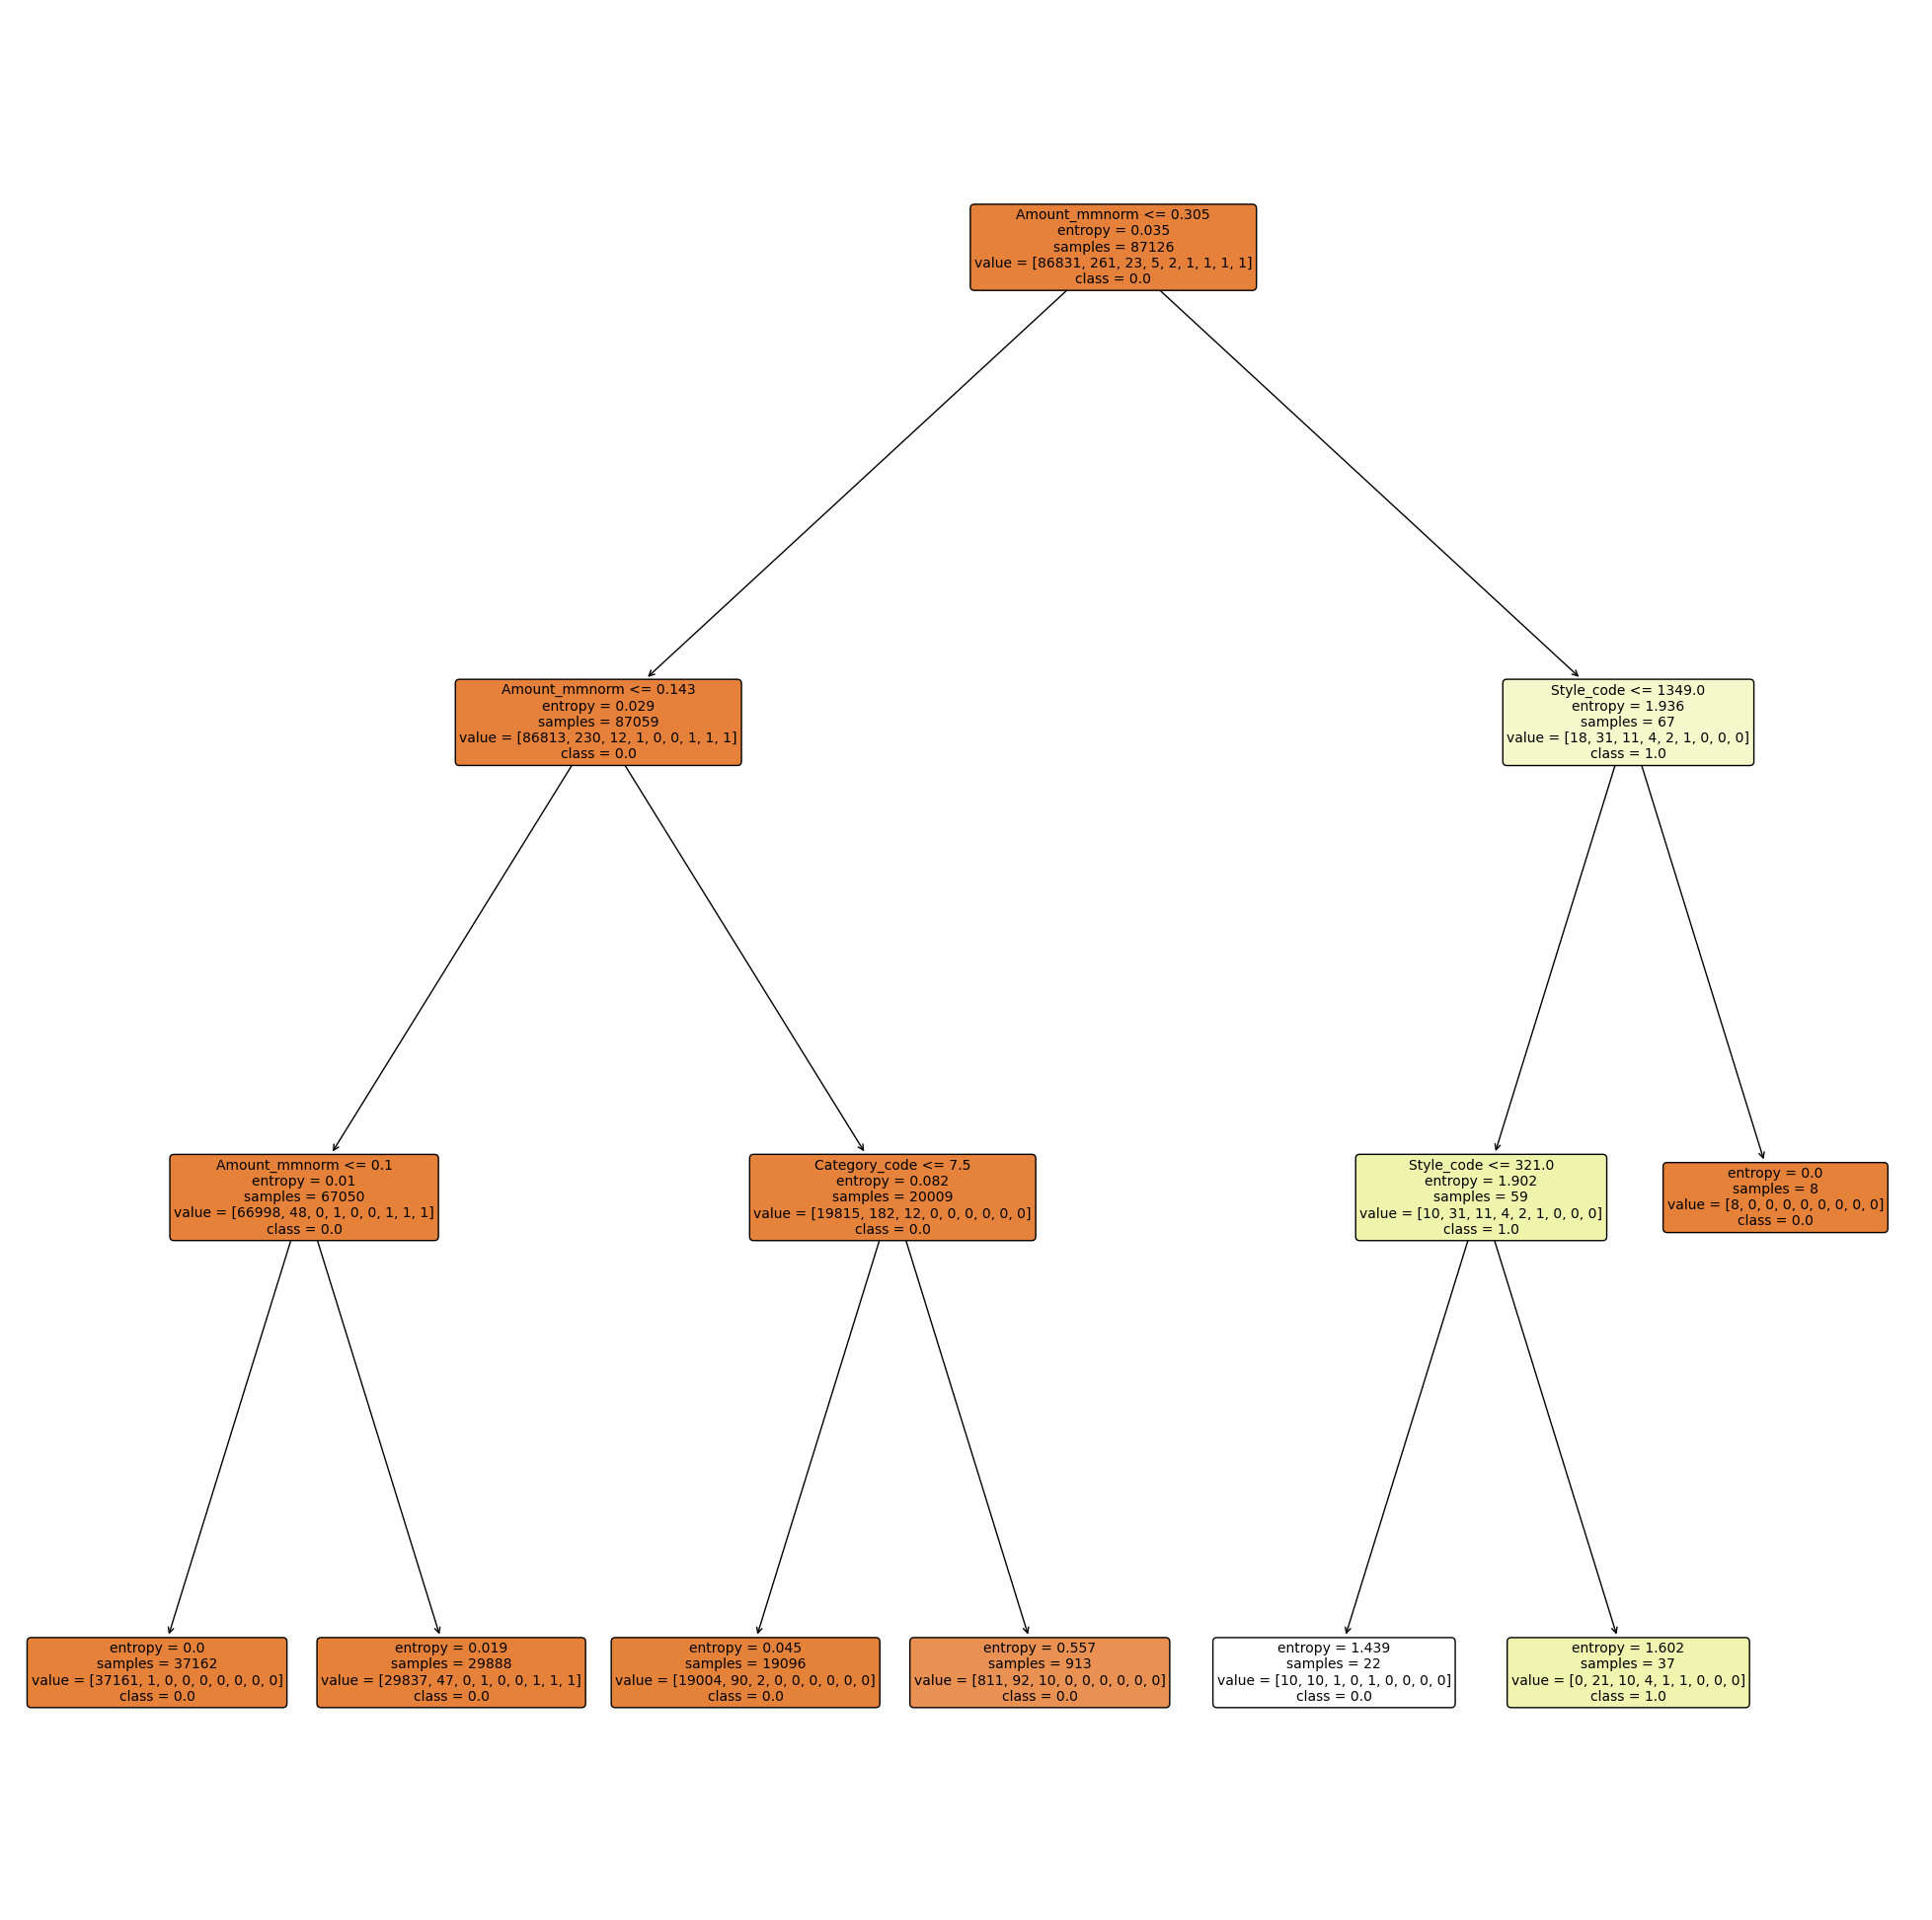

In [137]:
# Decision Tree : Plot [Training Subset] 
plt.figure(figsize = (25,25))
train_subset_dtc_plot = plot_tree(dtc_model, feature_names=xcol, class_names= df_output_labels, rounded=True, filled=True, fontsize=10)
plt.show()

Trees shows the relationship between quantity, category, size, style, amount. It was observed that 1 quantity of categories are bought when the amount_mn is less than equal to 0.30. When amount_mn is more than .14 people prefer to buy 1 quantity of Tops. When amount_mn is more than 0.3 and style is less than 1349 people buy 2 qty of category. Important factor of perdiction of quanity being amount followed by category and style and size not impacteing much. Here the important nodes being quantity and category and as the data have maximum people buying only 1 or 2 (class 0 and 1 resp.) thus, the tree perdicted the  pattern of these 2 class.

## Confusion Matrix
Confusion Matrix also known as {Error Matrix | Matching Matrix | Performance Matrix} of a Classifier is used for Evaluating the Quality of Prediction of Classes in a Classification Problem. It is a Two-Dimensional Matrix that compares Actual or Defined Classes vs Predicted Classes

In [122]:
from sklearn import metrics 
print(metrics.accuracy_score(y_test,dtc_predict))
#confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,dtc_predict)

0.9971420701053646


array([[28945,     4,     0,     0],
       [   66,    14,     0,     0],
       [    5,     4,     0,     0],
       [    2,     2,     0,     0]], dtype=int64)

In [120]:
# 4.1. Sensitivity or Recall or Hit Rate or True Positive Rate (TPR) : TP/[TP+FN] = 1-FNR 
# 4.2. Specificity or Selectivity or True Negative Rate (TNR) : TN/[TN+FP] = 1-FPR
# 4.3. Miss Rate or False Negative Rate (FNR) : FN/[FN+TP] = 1-TPR
# 4.4. Fallout or False Positive Rate (FPR) : FP/[FP+TN] = 1-TNR
# 4.5. Accuracy : [TP+TN]/[TP+FP+TN+FN]
# 4.6. Precision : TP/[TP+FP]
# 4.7. F1-Score [Harmonic Mean of Precision (P) & Recall (R)] : 2*[P*R]/[P+R] = [(TP)+(TP)]/[(TP+FP)+(TP+FN)]


<!-- #4.1. Sensitivity or Recall or Hit Rate or True Positive Rate (TPR) : TP/[TP+FN] = 1-FNR 
#4.2. Specificity or Selectivity or True Negative Rate (TNR) : TN/[TN+FP] = 1-FPR
#4.3. Miss Rate or False Negative Rate (FNR) : FN/[FN+TP] = 1-TPR
#4.4. Fallout or False Positive Rate (FPR) : FP/[FP+TN] = 1-TNR
#4.5. Accuracy : [TP+TN]/[TP+FP+TN+FN]
# 4.6. Precision : TP/[TP+FP]
# 4.7. F1-Score [Harmonic Mean of Precision (P) & Recall (R)] : 2*[P*R]/[P+R] = [(TP)+(TP)]/[(TP+FP)+(TP+FN)]
 -->

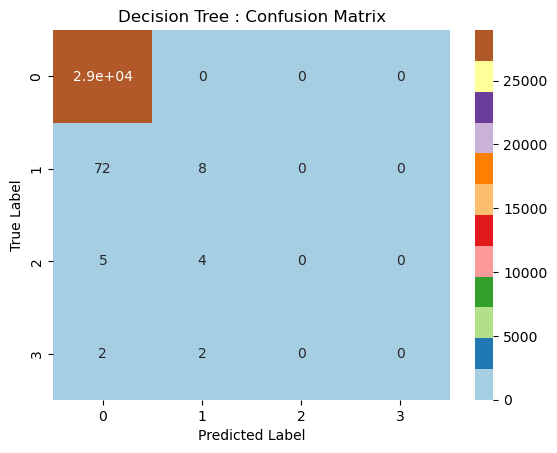

In [138]:
# Confusion Matrix : Plot [Testing Subset]
ax = plt.axes()
sns.heatmap(dtc_predict_conf_mat, annot=True, cmap='Paired')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Decision Tree : Confusion Matrix')
plt.show()

In [ ]:
# 4.0. Actual Classes [A & B] | Predicted Classes [A & B] | Let Preferred Class be A 
# 4.0.1. Actual Class = A & Predicted Class = A : Hit or True Positive (TP) 
# 4.0.2. Actual Class = B & Predicted Class = B : Correct Rejection or True Negative (TN) 
# 4.0.3. Actual Class = A & Predicted Class = B : False Alarm or Type-I Error or False Positive (FP) 
# 4.0.4. Actual Class = B & Predicted Class = A : Miss or Type-II Error or False Negative (FN)

approx 0 values are true positive in case of case 0(qty1), followed by 14 in qty2 and 0 in qty 3 and 4.However, 66 values are false poitive in qty = 2 and so on.

## Decision Tree 2 

In [140]:
# setting the input and output values for descison tree 2 
x1 = df_ppd[['Fulfilment_code', 'Sales Channel_code ', 'ship-service-level_code', 'Courier Status_code',
       'Qty_code', 'ship-state_code','B2B_code','Amount_mmnorm']]
y1 = df_ppd[['Status_code']]

In [143]:
x1_names = x1.columns; x1_names
y1_labels = y1['Status_code'].unique().astype(str); y1_labels

array(['5.0', '3.0', '0.0', '10.0', '9.0', '6.0', '7.0', '11.0', '8.0',
       '1.0', '2.0', '4.0', '12.0'], dtype='<U32')

In [144]:
# bifurcating in test and train
x1_train,x1_test , y1_train , y1_test = train_test_split(x1,y1,test_size = 0.25, random_state = 35024)

In [149]:
d1 = DecisionTreeClassifier(criterion = "entropy",max_depth = 3)
dtc_model1 = d1.fit(x1_train,y1_train)
dtc_model1

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [146]:
p1 = d1.predict(x1_test)
p1

array([3., 3., 3., ..., 3., 5., 3.])

In [147]:
#analysing the accuracy of test dataframe
print(metrics.accuracy_score(y1_test,p1))

0.967839680462778


In [150]:
#analysing the rule for decision tree2
dtc_model_rules1 = export_text(dtc_model1, feature_names = list(x1)); print(dtc_model_rules1)

|--- Fulfilment_code <= 0.50
|   |--- Courier Status_code <= 0.50
|   |   |--- Amount_mmnorm <= 0.20
|   |   |   |--- class: 3.0
|   |   |--- Amount_mmnorm >  0.20
|   |   |   |--- class: 3.0
|   |--- Courier Status_code >  0.50
|   |   |--- Sales Channel_code  <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- Sales Channel_code  >  0.50
|   |   |   |--- class: 3.0
|--- Fulfilment_code >  0.50
|   |--- Courier Status_code <= 0.50
|   |   |--- ship-state_code <= 9.50
|   |   |   |--- class: 5.0
|   |   |--- ship-state_code >  9.50
|   |   |   |--- class: 5.0
|   |--- Courier Status_code >  0.50
|   |   |--- ship-state_code <= 22.50
|   |   |   |--- class: 2.0
|   |   |--- ship-state_code >  22.50
|   |   |   |--- class: 1.0



In [151]:
# Decision Tree : Feature Importance
dtc_imp_features = pd.DataFrame({'feature': x1.columns, 'importance': np.round(dtc_model1.feature_importances_, 3)})
dtc_imp_features.sort_values('importance', ascending=False, inplace=True); dtc_imp_features

,feature,importance
0,Fulfilment_code,0.738
3,Courier Status_code,0.255
1,Sales Channel_code,0.006
2,ship-service-level_code,0.000
4,Qty_code,0.000
5,ship-state_code,0.000
6,B2B_code,0.000
7,Amount_mmnorm,0.000


In [152]:
# Decision Tree : Model Prediction (Training Subset)
dtc_model_predict1 = dtc_model1.predict(x1_train); dtc_model_predict1
# Decision Tree : Prediction (Testing Subset)
dtc_predict1 = dtc_model1.predict(x1_test); dtc_predict1

array([3., 3., 3., ..., 3., 5., 3.])

In [153]:
# Decision Tree : Model Evaluation (Training Subset)
dtc_model_conf_mat1 = pd.DataFrame(confusion_matrix(y1_train, dtc_model_predict1)); dtc_model_conf_mat1

,0,1,2,3,4,5,6,7,8,9,10,11
0,4207,0,0,1,0,0,0,0,0,0,0,0
1,313,120,60,5,0,0,0,0,0,0,0,0
2,0,106,94,0,0,0,0,0,0,0,0,0
3,0,0,0,58253,0,0,0,0,0,0,0,0
4,0,0,0,0,21614,0,0,0,0,0,0,0
5,0,0,0,0,4,0,0,0,0,0,0,0
6,0,0,0,0,24,0,0,0,0,0,0,0
7,0,0,0,0,736,0,0,0,0,0,0,0
8,0,0,0,0,7,0,0,0,0,0,0,0
9,0,0,0,0,1465,0,0,0,0,0,0,0


The model appears to perform very well on the majority classes (classes 0, 3, and 4) with a high number of correctly classified instances. For example, the model correctly predicts 4207 instances of class 0 (row 0, column 0), 58253 instances of class 3 (row 3, column 3), and 21614 instances of class 4 (row 4, column 4).However, for some of the other classes (classes 1, 2, 5, 6, 7, 8, 9, 10, and 11), the model's performance appears to be worse, with a lower number of correctly classified instances. For example, the model only correctly predicts 113 instances of class 1 (row 1, column 2), 4 instances of class 5 (row 5, column 4), and 4 instances of class 11 (row 11, column 3).Although these classes have less instances thus impacted the analysis less.Overall, the model fulfills the objective.

In [154]:
dtc_predict_perf1 = classification_report(y1_train, dtc_model_predict1); print(dtc_predict_perf1)

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96      4208
         1.0       0.53      0.24      0.33       498
         2.0       0.61      0.47      0.53       200
         3.0       1.00      1.00      1.00     58253
         5.0       0.90      1.00      0.95     21614
         6.0       0.00      0.00      0.00         4
         7.0       0.00      0.00      0.00        24
         8.0       0.00      0.00      0.00       736
         9.0       0.00      0.00      0.00         7
        10.0       0.00      0.00      0.00      1465
        11.0       0.00      0.00      0.00       113
        12.0       0.00      0.00      0.00         4

    accuracy                           0.97     87126
   macro avg       0.33      0.31      0.31     87126
weighted avg       0.94      0.97      0.95     87126



C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The ouput also shows the same result as above matrix results predciting the values of few classes quite well and rest classes having less instances quite low.

In [155]:
# Decision Tree : Prediction Evaluation (Testing Subset)
dtc_predict_conf_mat = pd.DataFrame(confusion_matrix(y1_test, dtc_predict1)); dtc_predict_conf_mat
dtc_predict_perf = classification_report(y1_test, dtc_predict1); print(dtc_predict_perf)

              precision    recall  f1-score   support

         0.0       0.05      1.00      0.09      1423
         1.0       0.00      0.00      0.00       158
         2.0       0.00      0.00      0.00        81
         3.0       0.00      0.00      0.00     19458
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00      7147
         6.0       0.00      0.00      0.00         1
         7.0       0.00      0.00      0.00        11
         8.0       0.00      0.00      0.00       237
         9.0       0.00      0.00      0.00         4
        10.0       0.00      0.00      0.00       485
        11.0       0.00      0.00      0.00        32
        12.0       0.00      0.00      0.00         4

    accuracy                           0.05     29042
   macro avg       0.00      0.08      0.01     29042
weighted avg       0.00      0.05      0.00     29042



C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


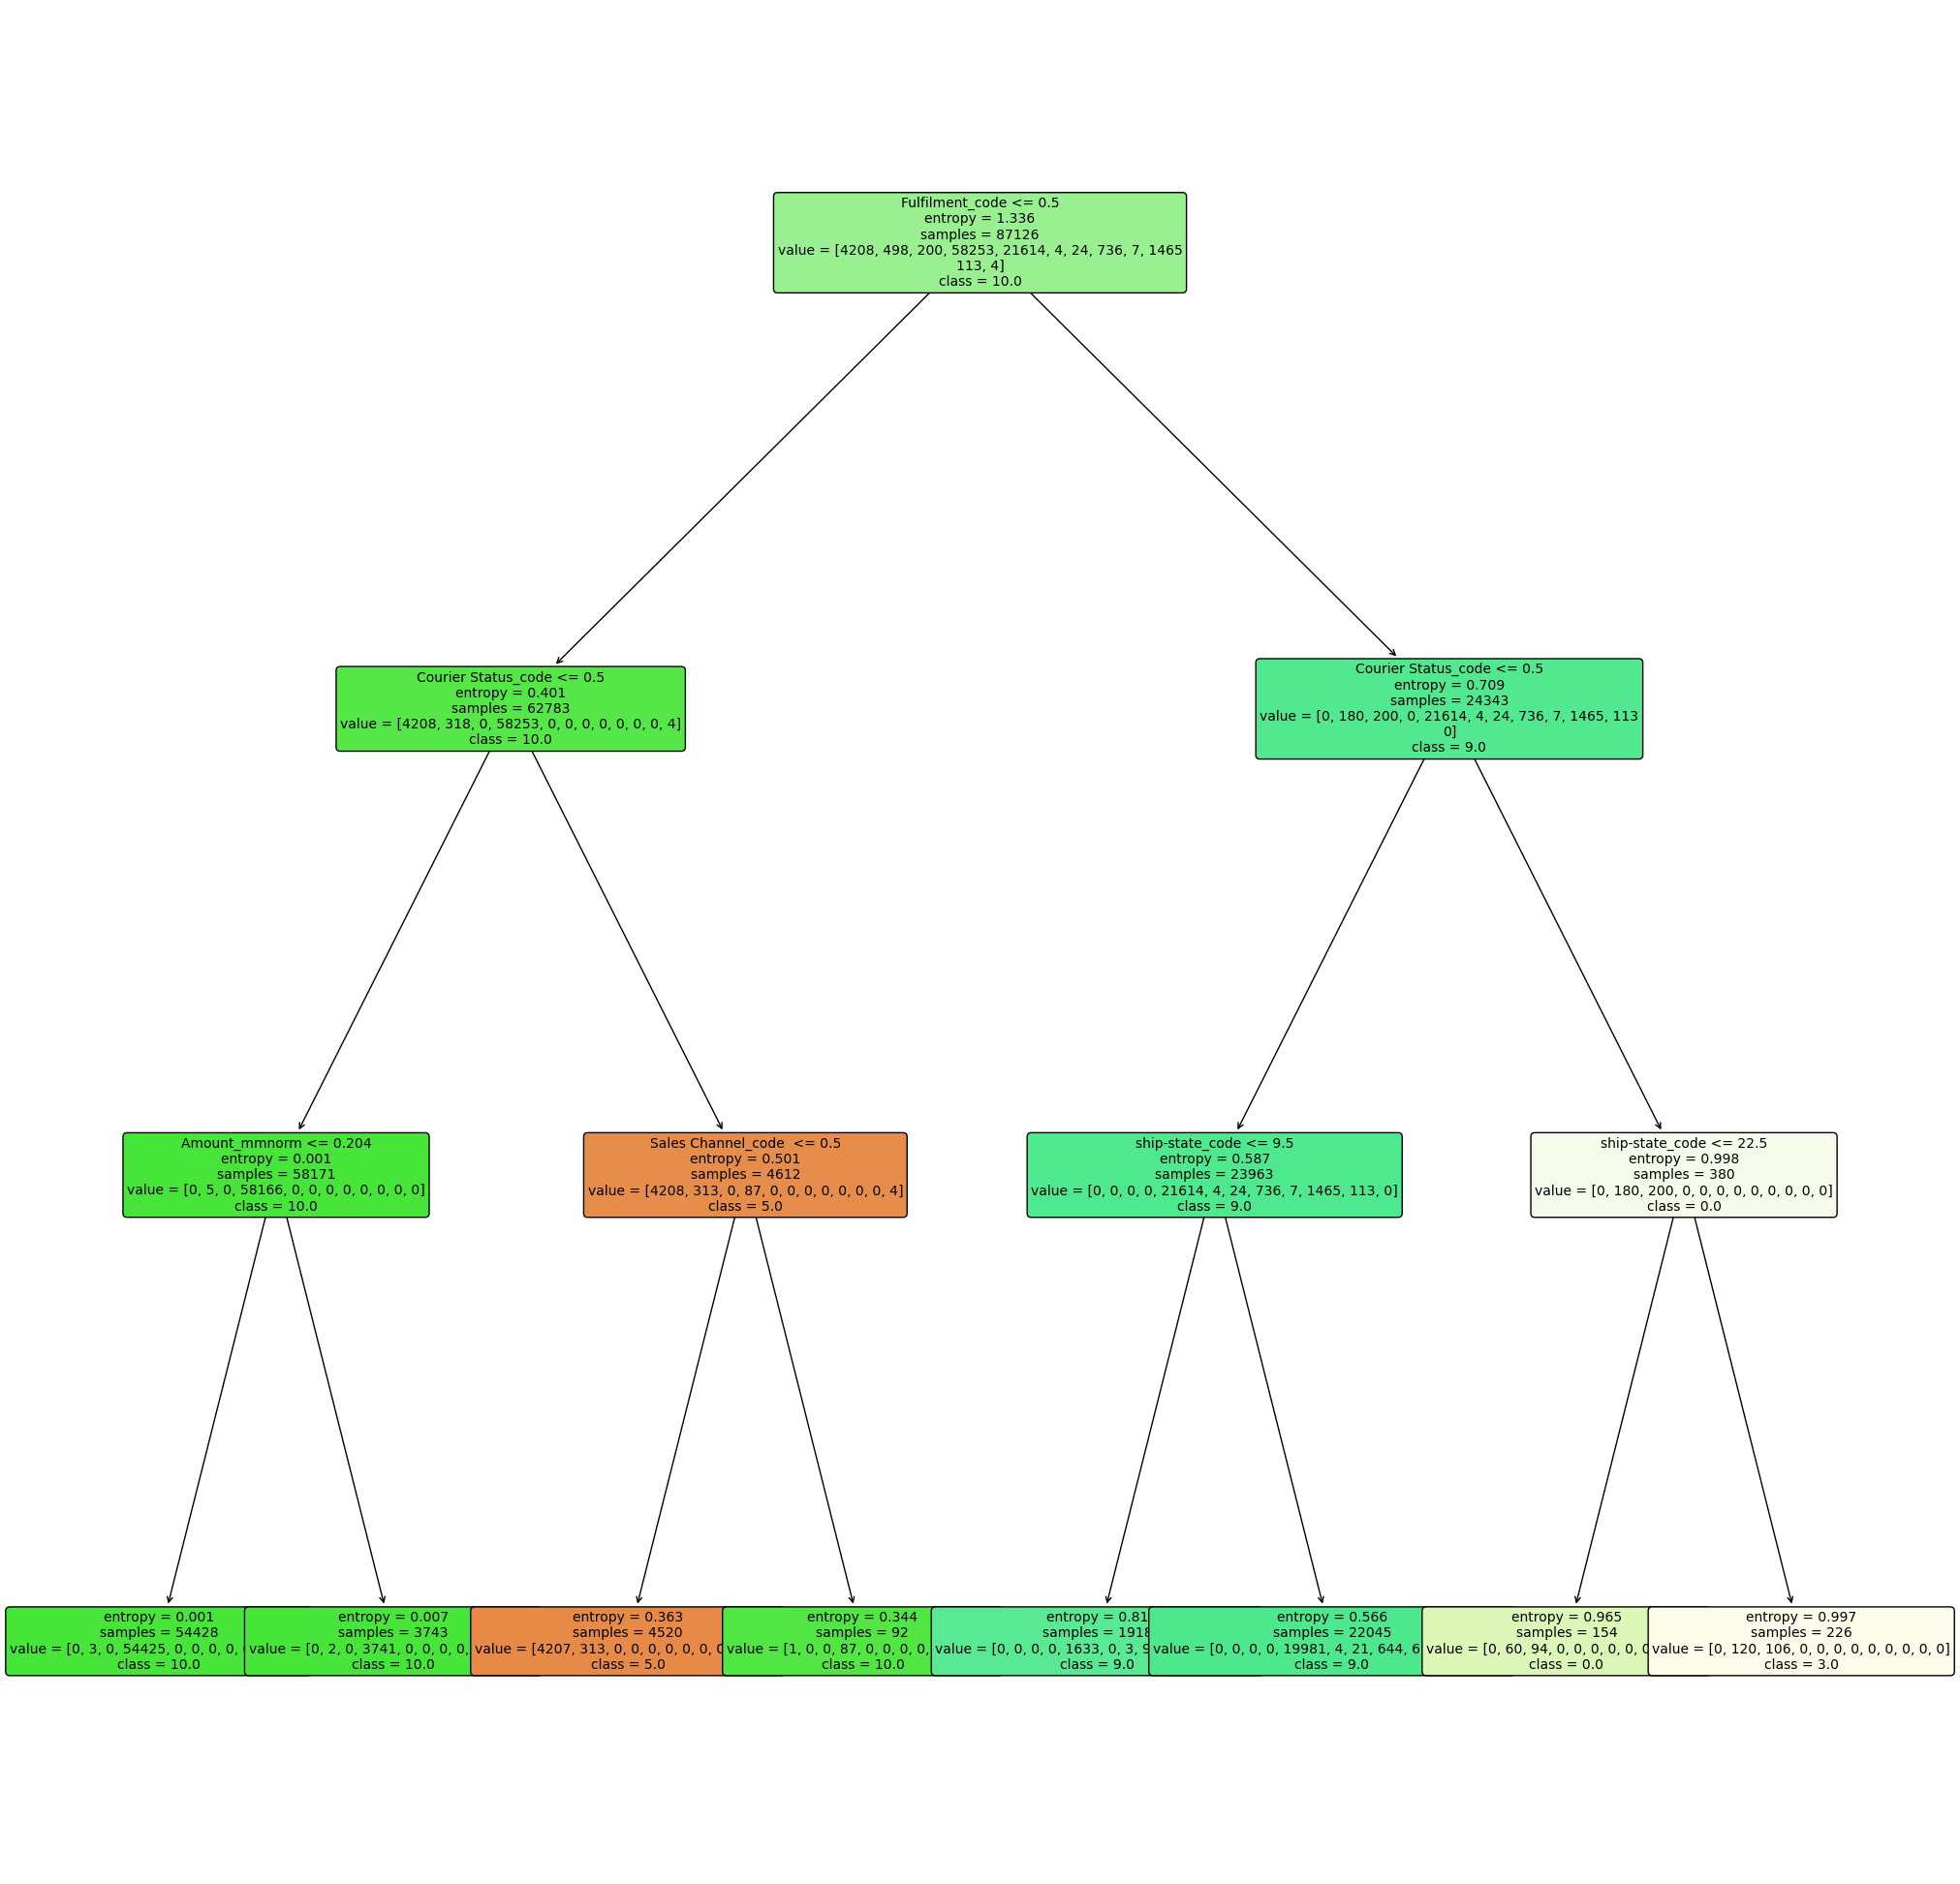

In [156]:
# Decision Tree : Plot [Training Subset] 
plt.figure(figsize = (25,25))
train_subset_dtc_plot1 = plot_tree(dtc_model1, feature_names=x1.columns, class_names= y1_labels, rounded=True, filled=True, fontsize=10)
plt.show()

If the courier status is more than 0.5 meaning when its not cancelled for orders from amazon the order delivery status is usually reflected as shipped. When the fulfillment of the order is through a merchant and the courier status is not cancelled then the order delivery status usually denotes delivered to buyer

In [159]:
from sklearn import metrics 
print(metrics.accuracy_score(y1_test,dtc_predict1))
#confusion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix(y1_test,dtc_predict1)

0.967839680462778


array([[ 1423,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [   90,    41,    22,     5,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,    42,    39,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0, 19458,     0,     0,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     1,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     0,  7147,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     1,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     0,    11,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,     0,     0,   237,     0,     0,     0,
            0,     0,     0,     0],
       [    0,     0,     0,

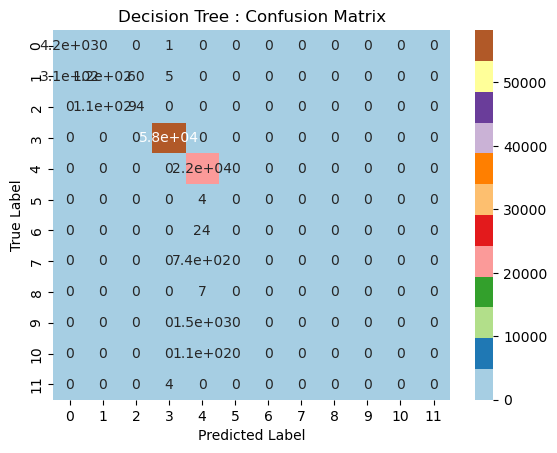

In [157]:
# Confusion Matrix : Plot [Testing Subset]
ax = plt.axes()
sns.heatmap(dtc_model_conf_mat1, annot=True, cmap='Paired')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Decision Tree : Confusion Matrix')
plt.show()

The matrix also shows the compoistion of true postive , true negative, false positive and false negative values. Here, the most values are true positive giving the highest sum of diagonal 

## Observations 
1. We found Amount and categories to be the most import features in determining a quantity with 0.69 and 0.26 level of importance respectively 
2. We have tried to understand the relationship between quantity, category, size, style, amount. It was observed that 1 quantity of categories are bought when the amount is less than equal to 0.30. When the amount is more than 14 people prefer to buy 1 quantity of Tops in B2B. When amount is more than 0.3 and style is less than 1349 people buy 2 qty of category
3. With a precision, recall and F1 value of 1 we infer that quantity 1 is the most preferred no. of quantity by people for buying a category in any size
4.  If the courier status is more than 0.5 meaning when its not cancelled for orders from amazon the order delivery status is usually reflected as shipped. When the fulfillment of the order is through a merchant and the courier status is not cancelled then the order delivery status usually denotes delivered to buyer
5. As per the classifiaction report 1 Test analysis shows the same pattern as train. The macro-average f1-score is 0.32, indicating that the model's performance is poor on average across all classes. The weighted-average f1-score is 1.00, which is high due to the high support for class 0.0.
6.  We found fulfilment and courier status to be the most import features in determining a quantity with 0.73 and 0.25 level of importance respectively
7. In this specific descison tree 1 of qty, the model has predicted 86821 samples to be in class 0(qty = 1), and correctly predicted 86821 of them to be in class 0(qty = 1). The model has also predicted 230 samples to be in class 1(qty = 2), but only correctly predicted 31 of them to be in class 1(qty = 2). Similarly, the model has predicted 12 samples to be in class 2(qty = 3), 1 sample to be in class 3(qty = 4), 2 samples to be in class 4, and so on.
8. Approx 0 values are true positive in case of case 0(qty1), followed by 14 in qty2 and 0 in qty 3 and 4.However, 66 values are false poitive in qty = 2 and so on in confusion matrix 1 
9. In confusion matrix 2, the matrix predicted the mosttrue poistive values as seen by diagonal
10. In summary, while the models appears to perform very well on the majority class, it struggles with the minority classes, and further improvements may be needed to improve its performance on these classes 

## Managerial Implications 
1. The manager must focus on the amount of a category in order to sell more and more number of a quantity
2. The number of tops fall for a B2B customer when the amount increases more than 14 in rule tree therefore manager must focus on keeping a check on the amount
3. Merchant orders usually result in more delivered orders than the ones ordered from Amazon therefore managers must focus on increasing the number of orders delivered through amazon
4. For determining the delivery status of an order manager must focus on the fulfillment and courier status
5. Comparison can be made of Amazon’s performance and sales with other merchant’s performances and sales 
6. Focusing on Amazon’s performance and sales can also greatly contribute towards its expansion



## ASSIGNMENT 3

## Clustering

## Objectives 
1.  To find which size is more preferred by the people and in which quantity
2.  To find which category of amazon’s clothing products is selling the most in comparison with the quantity
3.  To understand the unusual buying patterns of some consumers
4.  To find out clusters and K mean value using Silhouette scoring and Davies Bouldin scoring method in order to determine the outliers
5.  To visualise the relationship between the quantity and category
6.  To visualise the relationship between size and quantity
7.  To determine the correct number of clusters between quantity and category using elbow method
8.  To determine the correct number of clusters between size and quantity using elbow method
9.  To create a subset of the dataset which will be used for clustering


## Brief Of Analysis 
By clustering helps the company in postioning well. In our analysis we have used the elow curve to know the approporiate no. of clusters for eavh dataset. By doing clustering we have analysed the perdictable beahviour of customers on basis of same output. We have also analysed the outliers in datasets outputs  

In [240]:
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation

In [160]:
df_ppd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116168 entries, 0 to 116167
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Status                   116168 non-null  object 
 1   Fulfilment               116168 non-null  object 
 2   Sales Channel            116168 non-null  object 
 3   ship-service-level       116168 non-null  object 
 4   Style                    116168 non-null  object 
 5   Category                 116168 non-null  object 
 6   Size                     116168 non-null  object 
 7   Courier Status           116168 non-null  object 
 8   Qty                      116168 non-null  object 
 9   ship-city                116168 non-null  object 
 10  ship-state               116168 non-null  object 
 11  B2B                      116168 non-null  object 
 12  Status_code              116168 non-null  float64
 13  Fulfilment_code          116168 non-null  float64
 14  Sale

In [161]:
df_subset1 = df_ppd[['Qty','Category_code']]
df_subset1

,Qty,Category_code
0,1,8.0
1,1,8.0
2,1,6.0
3,1,5.0
4,1,5.0
...,...,...
116163,1,8.0
116164,1,5.0
116165,1,7.0
116166,1,5.0


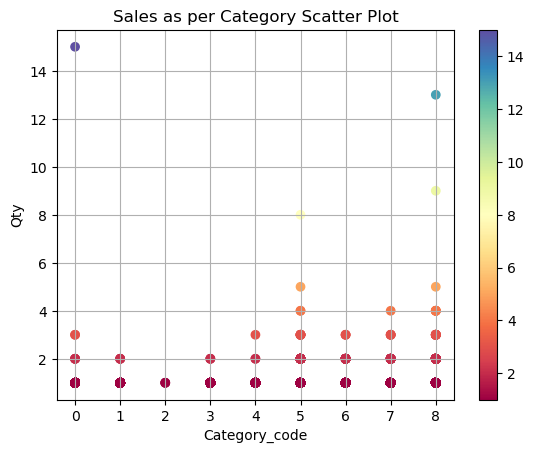

In [162]:
plt.scatter(x='Category_code', y='Qty', data= df_subset1, c='Qty', cmap='Spectral')
plt.xlabel('Category_code')
plt.ylabel('Qty')
plt.title('Sales as per Category Scatter Plot')
plt.colorbar()
plt.grid()
plt.show()

# clutering1 using k mean
K-means clustering is a partitioning method that involves dividing a dataset into k clusters, where each data point belongs to the cluster with the nearest mean.The objective is to minimize the sum of squared distances between data points and their assigned cluster centroids. K-means is generally faster than hierarchical clustering, and is more suitable for larger datasets with a fixed number of clusters

C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Harmeet Kaur\anacon

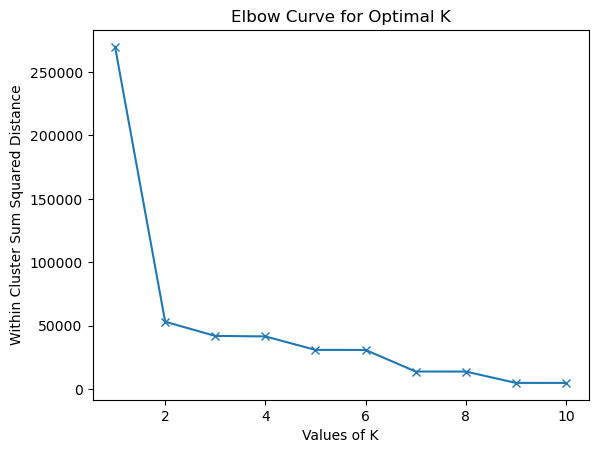

In [59]:
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state= 35024) 
    kmeans.fit(df_subset1)
    wcssd.append(kmeans.inertia_) 
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K') 
plt.ylabel('Within Cluster Sum Squared Distance') 
plt.title('Elbow Curve for Optimal K')
plt.show()

In [163]:
#Create K-Means Clusters [K=2 | K=6 | K= 4]

In [60]:
km_2cluster1 = kmclus(n_clusters=2, init='random', random_state= 35024)
km_2cluster_model = km_2cluster1.fit_predict(df_subset1); km_2cluster_model

C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 0, ..., 1, 0, 0])

In [62]:
km_6cluster1 = kmclus(n_clusters=6, init='random', random_state= 35024)
km_6cluster_model = km_6cluster1.fit_predict(df_subset1); km_6cluster_model

C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 5, ..., 2, 1, 1])

In [64]:
km_4cluster1 = kmclus(n_clusters=4, init='random', random_state= 35024)
km_4cluster_model = km_4cluster1.fit_predict(df_subset1); km_4cluster_model

C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, ..., 2, 3, 3])

In [164]:
#K-Means Clustering Model Evaluation [K=2 | K=6| K = 4]

In [65]:
dbscore_km_2cluster1 = dbscore(df_subset1, km_2cluster_model); dbscore_km_2cluster1

0.25653764650672445

In [67]:
sscore_km_2cluster1 = sscore(df_subset1, km_2cluster_model); sscore_km_2cluster1

0.8190432949808824

In [68]:
dbscore_km_6cluster1 = dbscore(df_subset1, km_6cluster_model); dbscore_km_6cluster1

0.2868166945442387

In [69]:
sscore_km_6cluster1 = sscore(df_subset1, km_6cluster_model); sscore_km_6cluster1

0.9135676312496296

In [70]:
dbscore_km_4cluster1 = dbscore(df_subset1, km_4cluster_model); dbscore_km_4cluster1

0.42437330483512054

In [71]:
sscore_km_4cluster1 = sscore(df_subset1, km_4cluster_model); sscore_km_4cluster1

0.7786386411123639

In [73]:
# Davies-Bouldin Score : K=2 Cluster < K=6 Cluster< K = 4 cluster => K=2 is more appropriate
# Silhouette Score : K=6 Cluster > K=2 Cluster => K=4,  6 clusters are more appropriate 
# Appropriate Number of Clusters : 2 (Based on Silhouette Score & Davies-Bouldin Score)
#to make the correct use of alogritim we have used both agglormative and k mean to make best predictions

In [ ]:
## agglormative 
# ah_2cluster = agclus(n_clusters=2, affinity='euclidean', linkage='ward')
# ah_2cluster_model = ah_2cluster.fit_predict(df_subset1); ah_2cluster_model

# ah_3cluster = agclus(n_clusters=3, affinity='euclidean', linkage='ward')
# ah_3cluster_model = ah_3cluster.fit_predict(df_subset1); ah_3cluster_model

# sscore_ah_2cluster = sscore(df_subset, ah_2cluster_model); print(sscore_ah_2cluster)
# dbscore_ah_2cluster = dbscore(df_subset, ah_2cluster_model); print(dbscore_ah_2cluster)

# sscore_ah_3cluster = sscore(df_subset, ah_3cluster_model); print(sscore_ah_3cluster)
# dbscore_ah_3cluster = dbscore(df_subset, ah_3cluster_model); print(dbscore_ah_3cluster)

In [ ]:
# df_subset_ahcluster = df_subset.copy()
# df_subset_ahcluster.reset_index(level=0, inplace=True, names='Index')
# df_subset_ahcluster['cluster_number'] = ah_2cluster_model
# df_subset_ahcluster.sort_values('cluster_number', inplace=True); df_subset_ahcluster

# # Create Agglomerative Linkages 
# agg_link = sch.linkage(df_subset, method='ward', metric='euclidean')

# plt.figure()
# dendrogram = sch.dendrogram(agg_link)
# plt.xlabel('Age')
# plt.ylabel('Scaled Euclidean Distance')
# plt.title('Dendrogram')
# plt.show()

# cluster_labels = list(df_subset_ahcluster['cluster_number'].unique())
# ah_clusterplot_mpl = plt.scatter(x='Age', y='Card Debt', data=df_subset_ahcluster, c='cluster_number', cmap='brg')
# plt.legend(handles=ah_clusterplot_mpl.legend_elements()[0], labels=cluster_labels)
# plt.xlabel('Age')
# plt.ylabel('Card Debt')
# plt.title('Age Debt Scatter Plot : Agglomerative Hierarchical Clusters')
# plt.grid()
# plt.show()

In [74]:
#Create a KMeans Cluster Member Dataframe
df_subset_kmcluster = df_subset1.copy()
df_subset_kmcluster.reset_index(level=0, inplace=True, names='amazon_index')
df_subset_kmcluster

,amazon_index,Qty,Category_code
0,0,1,8.0
1,1,1,8.0
2,2,1,6.0
3,3,1,5.0
4,4,1,5.0
...,...,...,...
116163,116163,1,8.0
116164,116164,1,5.0
116165,116165,1,7.0
116166,116166,1,5.0


In [75]:
df_subset_kmcluster['cluster_number'] = km_6cluster_model
df_subset_kmcluster.sort_values('cluster_number', inplace=True); df_subset_kmcluster

,amazon_index,Qty,Category_code,cluster_number
0,0,1,8.0,0
38691,38691,1,8.0,0
38692,38692,1,8.0,0
87031,87031,1,8.0,0
87030,87030,1,8.0,0
...,...,...,...,...
25880,25880,1,6.0,5
33441,33441,1,6.0,5
108717,108717,1,6.0,5
33442,33442,1,6.0,5


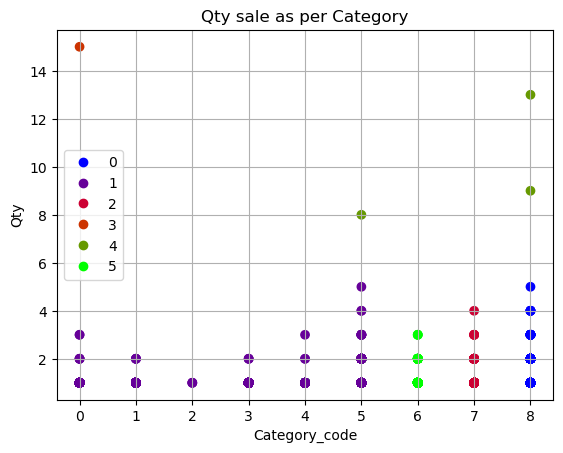

In [76]:
#Plot the K-Means Clustered Data
cluster_labels = list(df_subset_kmcluster['cluster_number'].unique())
scatter_plot = plt.scatter(x='Category_code', y='Qty', data= df_subset_kmcluster, c='cluster_number', cmap='brg')
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)
plt.xlabel('Category_code')
plt.ylabel('Qty')
plt.title('Qty sale as per Category')
plt.grid()
plt.show()

[Text(0.5, 1.0, 'Car Mileage vs Horsepower Scatter Plot : K-Means Clusters')]

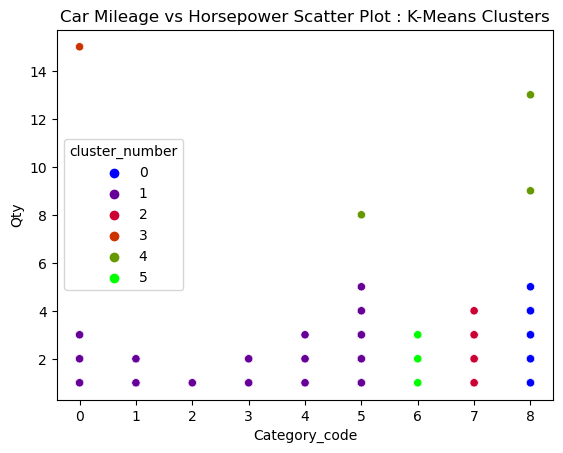

In [77]:
km_clusterplot_sb = sns.scatterplot(x='Category_code', y='Qty', hue='cluster_number', palette='brg', data=df_subset_kmcluster)
km_clusterplot_sb.set(title='Car Mileage vs Horsepower Scatter Plot : K-Means Clusters')

In [ ]:
## clustering 2 

In [78]:
df_subset2 = df_ppd[['Size_code', 'Qty']]; df_subset2

,Size_code,Qty
0,0.0,1
1,8.0,1
2,0.0,1
3,8.0,1
4,5.0,1
...,...,...
116163,8.0,1
116164,6.0,1
116165,10.0,1
116166,9.0,1


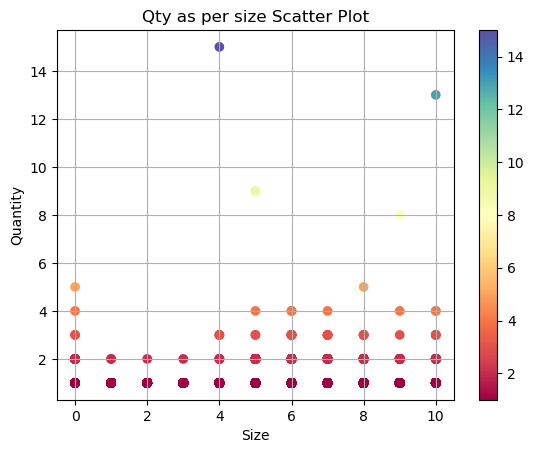

In [79]:
plt.scatter(x='Size_code', y='Qty', data= df_subset2, c='Qty', cmap='Spectral')
plt.xlabel('Size')
plt.ylabel('Quantity')
plt.title('Qty as per size Scatter Plot')
plt.colorbar()
plt.grid()
plt.show()

C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Harmeet Kaur\anacon

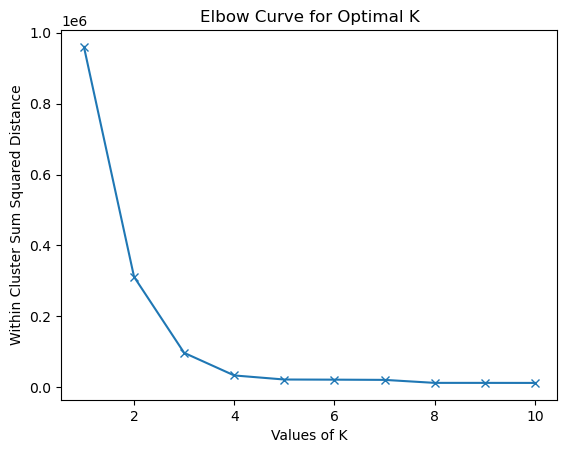

In [80]:
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state= 35024) 
    kmeans.fit(df_subset2)
    wcssd.append(kmeans.inertia_) 
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K') 
plt.ylabel('Within Cluster Sum Squared Distance') 
plt.title('Elbow Curve for Optimal K')
plt.show()

In [81]:
km_2cluster = kmclus(n_clusters=2, init='random', random_state= 35024)
km_2cluster_model = km_2cluster.fit_predict(df_subset2); km_2cluster_model

C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, ..., 1, 1, 1])

In [82]:
km_3cluster = kmclus(n_clusters=3, init='random', random_state= 35024)
km_3cluster_model = km_3cluster.fit_predict(df_subset2); km_3cluster_model

C:\Users\Harmeet Kaur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 0, ..., 1, 1, 1])

In [84]:
dbscore_km_2cluster = dbscore(df_subset2, km_2cluster_model); dbscore_km_2cluster

0.2731947615928364

In [86]:
sscore_km_2cluster = sscore(df_subset2, km_2cluster_model); sscore_km_2cluster

0.7334319208647132

In [87]:
dbscore_km_3cluster = dbscore(df_subset2, km_3cluster_model); dbscore_km_3cluster

0.3955107500147661

In [88]:
sscore_km_3cluster = sscore(df_subset2, km_3cluster_model); sscore_km_3cluster

0.66274206628102

In [89]:
## agglormative 
# ah_2cluster = agclus(n_clusters=2, affinity='euclidean', linkage='ward')
# ah_2cluster_model = ah_2cluster.fit_predict(df_subset2); ah_2cluster_model

# ah_3cluster = agclus(n_clusters=3, affinity='euclidean', linkage='ward')
# ah_3cluster_model = ah_3cluster.fit_predict(df_subset2); ah_3cluster_model

# sscore_ah_2cluster = sscore(df_subset, ah_2cluster_model); print(sscore_ah_2cluster)
# dbscore_ah_2cluster = dbscore(df_subset, ah_2cluster_model); print(dbscore_ah_2cluster)

# sscore_ah_3cluster = sscore(df_subset, ah_3cluster_model); print(sscore_ah_3cluster)
# dbscore_ah_3cluster = dbscore(df_subset, ah_3cluster_model); print(dbscore_ah_3cluster)

In [90]:
# Silhouette Score : K=2 Cluster > K=3 Cluster => K=2 is more appropriate 
# Davies-Bouldin Score : K=2 Cluster < K=3 Cluster => K=2 is more appropriate
# Appropriate Number of Clusters : 2 (Based on Silhouette Score & Davies-Bouldin Score)

In [94]:
df_subset_kmcluster2 = df_subset2.copy()
df_subset_kmcluster2.reset_index(level=0, inplace=True, names='amazon_index')
df_subset_kmcluster2

,amazon_index,Size_code,Qty
0,0,0.0,1
1,1,8.0,1
2,2,0.0,1
3,3,8.0,1
4,4,5.0,1
...,...,...,...
116163,116163,8.0,1
116164,116164,6.0,1
116165,116165,10.0,1
116166,116166,9.0,1


In [96]:
df_subset_kmcluster2['cluster_number'] = km_2cluster_model
df_subset_kmcluster2.sort_values('cluster_number', inplace=True); df_subset_kmcluster2

,amazon_index,Size_code,Qty,cluster_number
0,0,0.0,1,0
30449,30449,0.0,1,0
89311,89311,0.0,1,0
30440,30440,0.0,1,0
89312,89312,0.0,1,0
...,...,...,...,...
41021,41021,5.0,1,1
41019,41019,5.0,1,1
41018,41018,8.0,1,1
41051,41051,10.0,1,1


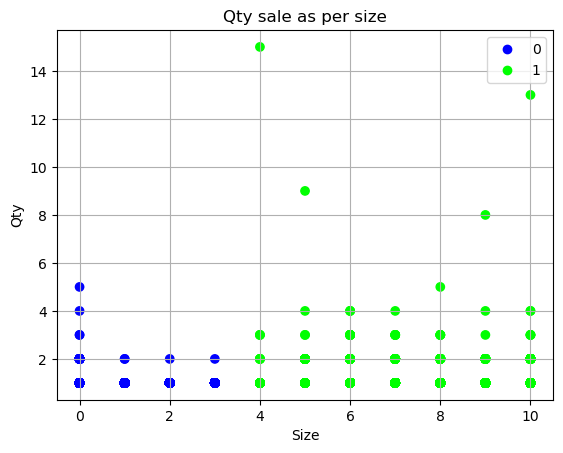

In [97]:
cluster_labels = list(df_subset_kmcluster2['cluster_number'].unique())
scatter_plot = plt.scatter(x='Size_code', y='Qty', data= df_subset_kmcluster2, c='cluster_number', cmap='brg')
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)
plt.xlabel('Size')
plt.ylabel('Qty')
plt.title('Qty sale as per size')
plt.grid()
plt.show()

[Text(0.5, 1.0, 'Car Mileage vs Horsepower Scatter Plot : K-Means Clusters')]

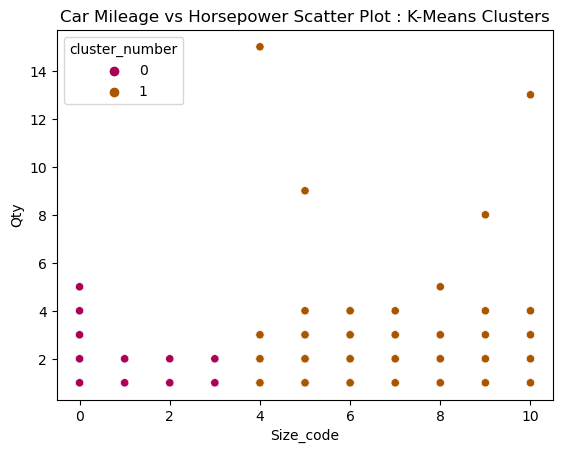

In [98]:
km_clusterplot_sb = sns.scatterplot(x='Size_code', y='Qty', hue='cluster_number', palette='brg', data=df_subset_kmcluster2)
km_clusterplot_sb.set(title='Car Mileage vs Horsepower Scatter Plot : K-Means Clusters')

## Observations
1.  On comparing the categories and the quantities of the report we have found that most people do not prefer to buy more than 4 quantities of a category. However, there have been some exceptions in cases like blouse where the maximum quantity sold was 15 or in the case of western dresses where the maximum quantity sold was 13.
2.  We used K mean clustering to determine clusters for our analysis which will help us understand any outliers and unusual behaviors. For this we took 2, 4, 6 and 8 values of K from the elbow curve. We used two methods to score the K values, One, Davies Bouldin Score which should 2 to be more appropriate value for K and another one, Silhouette Score which showed 6 to be the appropriate value of K. Since these are two varied kinds of values we decided to move increasingly from 2 to 6, we discovered that the clustering using a K value of 2 was giving a much more comprehensive result than the clustering using 6 K value, thus K value of 2 was apppropiate
3. We further compared size and quantity and found that most people prefer to buy an average of 4 pieces in any particular size. However, we found an outlier case where 15 pieces of XXL sizes were bought and 13 pieces of free size clothes were bought
4.  While making a cluster of size and quantity we used silhouette and Davies Bouldin Score to find appropriate value of K which came out to be 2 by both the scores
5. A scatter plot was plotted keeping category on X-axis and quantity on Y-axis for the visualistion of the Data and it's better understanding
6. A scatter plot was plotted keeping size on X-axis and quantity on Y-axis for the visualistion of the Data and it's better understanding
7. Elbow method is used to plot the within-cluster sum of squares (WCSS) against the number of clusters K and identify the "elbow" point in the plot, which is the point of maximum curvature. We found the cluster points to be 2,4 and 6 between category and quantity
8. Elbow method is used to plot the within-cluster sum of squares (WCSS) against the number of clusters K and identify the "elbow" point in the plot, which is the point of maximum curvature. We found the cluster points to be 2,4 and 6 between size and quantity
9. We have created two different subsets of size and quantity and category and quantity

## Managerial Implications
1. Since most of the people prefer to buy tops as inferred from the category’s column, the managers must focus on improving the availability, quality and quantity of these articles
2. Sizes of 3XL, XS, 6XL, M, 4XL, 5XL, and FREE are bought buy more people, thus, the managers should focus on maintain a higher inventory for these sizes instead of maintaining a higher SKU for other commonly available sizes
3. It was discovered that an average of 4 pieces are sold for a category with some exceptions like blouses and western dresses. Similarly, an average of 4 pieces in a size is sold with some outliers lying in XXL. We discovered all these outliers with the help of K mean.
4. 4. An effective resource planning can further imply a smoother decision making and better supply chain management. 
5. The size and category can also help in product segmentation with the help of similarities found in these clusters 


In [421]:
df[['Qty','Amount']].groupby(df['Fulfilment']).mean()

,Qty,Amount
Fulfilment,,
Amazon,1.003868,649.483506
Merchant,1.004845,650.527851


In [422]:
df['Amount'].groupby(df['Status']).max()

Status
Cancelled                        2676.0
Pending                          1672.0
Pending - Waiting for Pick Up    2326.0
Shipped                          5584.0
Shipped - Damaged                1136.0
Shipped - Delivered to Buyer     5495.0
Shipped - Lost in Transit         999.0
Shipped - Out for Delivery       1399.0
Shipped - Picked Up              1998.0
Shipped - Rejected by Buyer       967.0
Shipped - Returned to Seller     2796.0
Shipped - Returning to Seller    1976.0
Shipping                            NaN
Name: Amount, dtype: float64

In [423]:
a = df.groupby(['ship-state', 'ship-city'])
a.mean()

C:\Users\Harmeet Kaur\AppData\Local\Temp\ipykernel_22776\899951733.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  a.mean()


Qty      Amount  \
ship-state         ship-city                                                 
ANDAMAN & NICOBAR  Andaman and nicobar islands port Blair  1.0  999.000000   
                   BAMBOOFLAT                              1.0  766.625000   
                   FERRARGUNJ                              1.0  634.888889   
                   GARACHARMA                              1.0  307.000000   
                   GREAT NICOBAR                           1.0  657.666667   
...                                                        ...         ...   
punjab             phagwara                                1.0  472.000000   
rajasthan          jaipur                                  1.0  439.000000   
                   madanganj-kishangarh  ajmer             1.0  872.000000   
                   sriganganagar                           1.0  885.000000   
rajsthan           Bheem                                   1.0  521.000000   

                                                           B2B  
ship-state         ship-city                                    
ANDAMAN & NICOBAR  Andaman and nicobar islands port Blair  0.0  
                   BAMBOOFLAT                              0.0  
                   FERRARGUNJ                              0.0  
                   GARACHARMA                              0.0  
                   GREAT NICOBAR                           0.0  
...                                                        ...  
punjab             phagwara                                0.0  
rajasthan          jaipur                                  0.0  
                   madanganj-kishangarh  ajmer             0.0  
                   sriganganagar                           0.0  
rajsthan           Bheem                                   0.0  

[8684 rows x 3 columns]

C:\Users\Harmeet Kaur\AppData\Local\Temp\ipykernel_22776\353379857.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_over_time = df.groupby('Date').sum()['Amount']


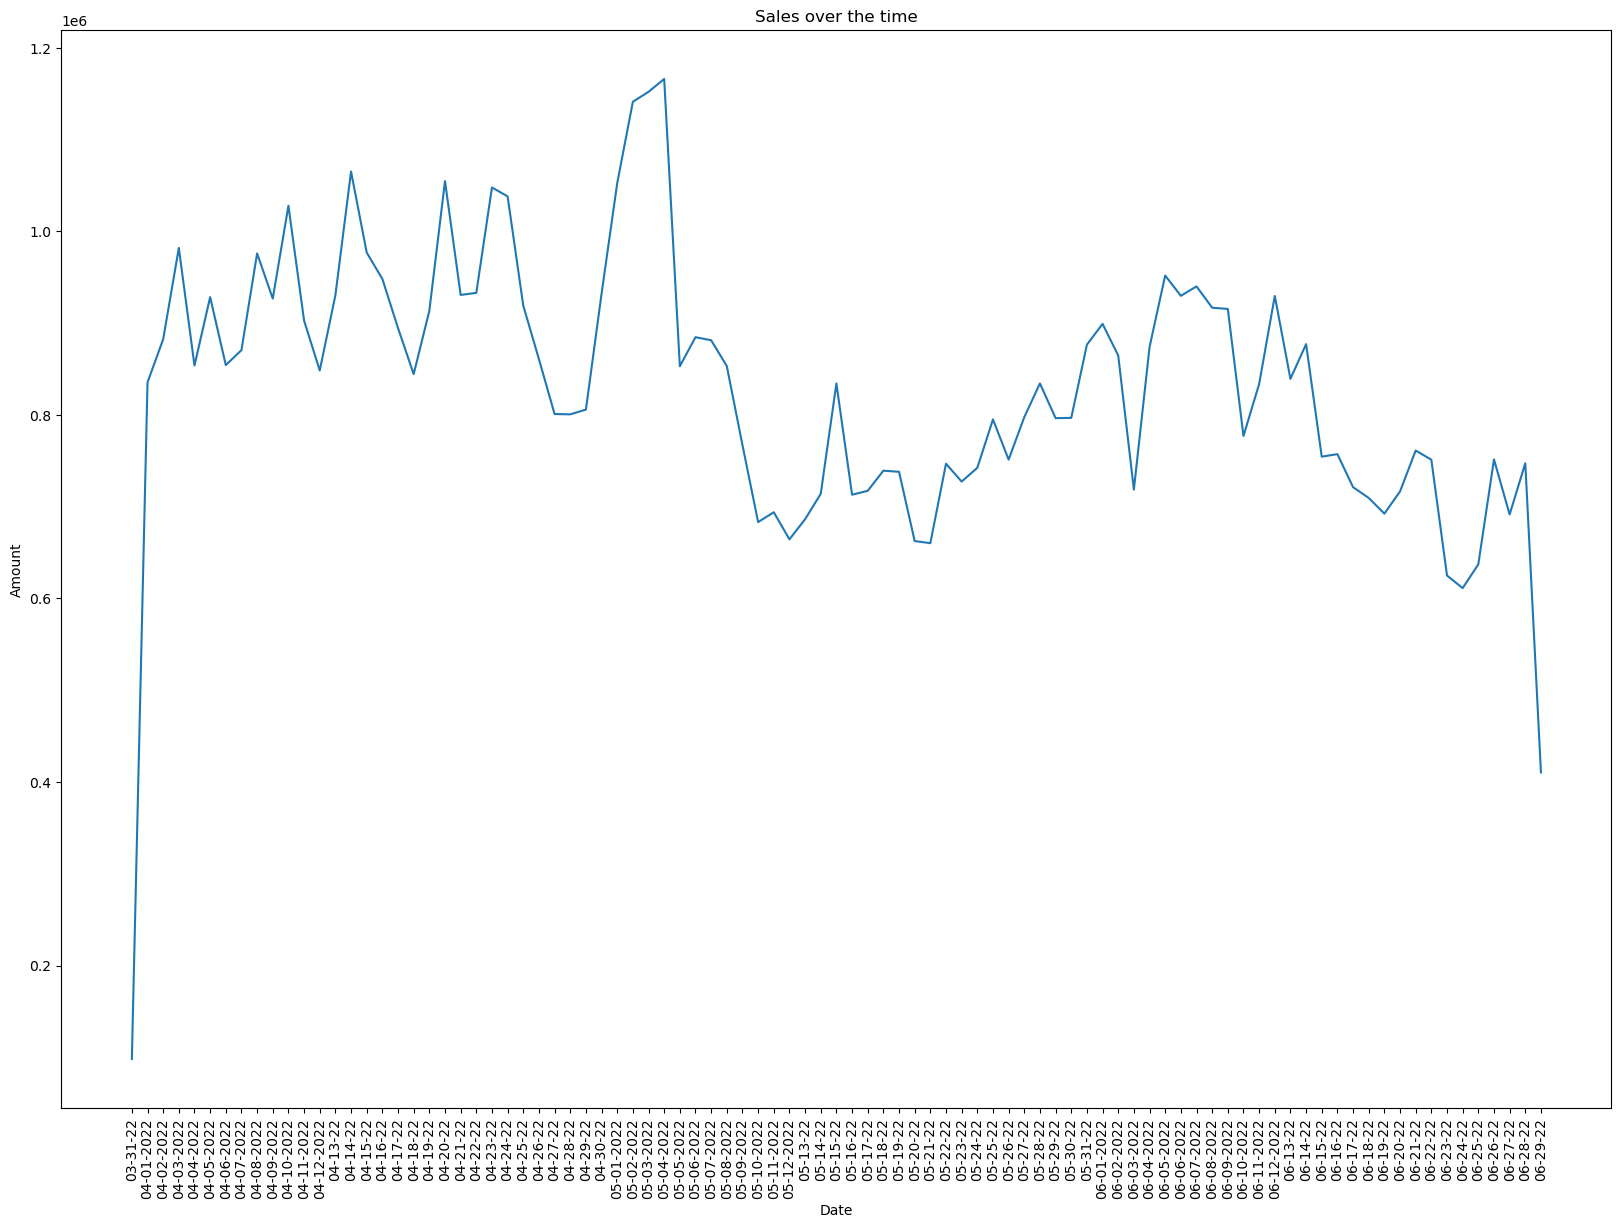

In [424]:
sales_over_time = df.groupby('Date').sum()['Amount']


fig = plt.figure(figsize=(20, 14))
plt.plot(sales_over_time.index, sales_over_time.values)

plt.title('Sales over the time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.show()

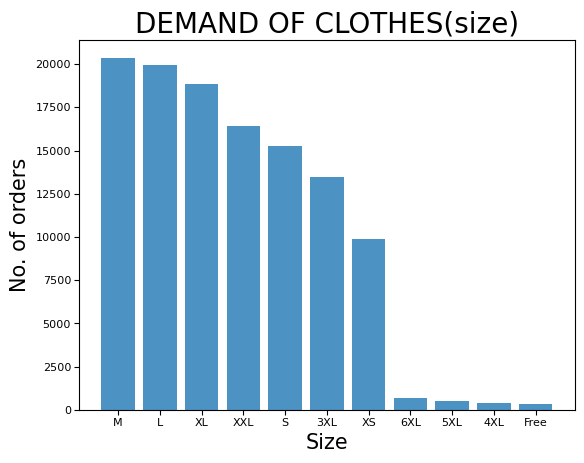

In [425]:
plt.bar(x=df_ppd.Size.value_counts().index,height=df_ppd.Size.value_counts(),alpha=0.8)
plt.xlabel("Size",fontdict={"size":15})
plt.ylabel("No. of orders",fontdict={"size":15})
plt.title("DEMAND OF CLOTHES(size)",fontdict={"size":20})
plt.tick_params(labelsize=8,pad=2)

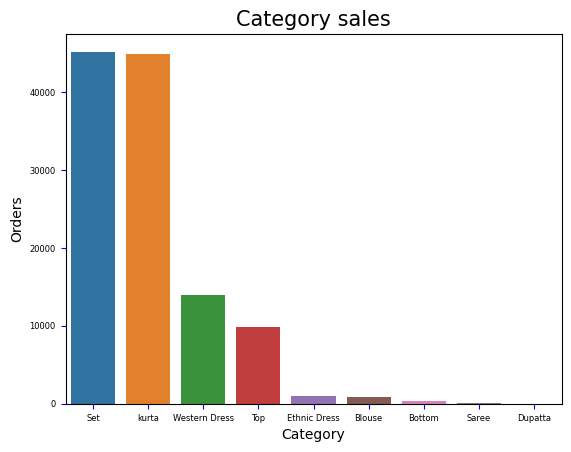

In [426]:
sns.barplot(x=df_ppd['Category'].value_counts().index,y=df_ppd['Category'].value_counts())
plt.title("Category sales",fontdict={'size':15,"color":"k"})
plt.xlabel("Category",fontdict={'size':10,"color":"k"})
plt.ylabel("Orders",fontdict={'size':10,"color":"k"})
plt.tick_params(labelsize=6,color='b')

## some more insights from dataset 
1. Amazon and merchant has contributed approx same in qty and amount revenue of amazon sales 
2. The most categories are shipped and delivered and leat are cancelled by buyers showing thw goodwill of amazon
3. Amazon has seen the fluacttions in sales in the given period 
4. The most preferred size is M and least is free
5. The most popular category is set and least is duppata 
6. There are many cities in state sales showing amazon reach throughout india 
